In [ ]:
import torch
from torchvision import models, transforms
import requests
from PIL import Image
import torch.nn.functional as F

#define alexnet model
# alexnet = models.alexnet(pretrained=True).cuda(0)
# labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
from torchvision import models, transforms
import torch

# 1) Load model with the new weights API
weights = models.AlexNet_Weights.IMAGENET1K_V1
alexnet = models.alexnet(weights=weights).cuda(0)
alexnet.eval()

# 2) Grab the list of 1,000 class names
labels = weights.meta['categories']  # this is a list of 1000 strings

# 3) Preprocessing pipeline
preprocess = weights.transforms()

# 4) Inference example
from PIL import Image
# img = Image.open("path/to/your.jpg")
url = 'https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-732x549.jpg'
img = Image.open(requests.get(url, stream=True).raw)
batch = preprocess(img).unsqueeze(0).cuda(0)  # shape [1,3,224,224]
with torch.no_grad():
    logits = alexnet(batch)
probs = torch.nn.functional.softmax(logits, dim=1)[0]
top5_prob, top5_catid = probs.topk(5)

for prob, catid in zip(top5_prob, top5_catid):
    print(f"{labels[catid]}: {prob:.4f}")

#transform image for use in model
preprocess = transforms.Compose([
   transforms.Resize(256),
   transforms.CenterCrop(224),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
])

#load the image from its url
url = 'https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/02/322868_1100-732x549.jpg'
img = Image.open(requests.get(url, stream=True).raw)
img_t = preprocess(img).unsqueeze_(0).cuda(0)

Sussex spaniel: 0.3610
golden retriever: 0.3190
Brittany spaniel: 0.1859
vizsla: 0.0290
tennis ball: 0.0286


In [ ]:
img_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
labels

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [ ]:
#classify the image with alexnet
scores, class_idx = alexnet(img_t).max(1)
print('Predicted class:', labels[class_idx.item()])

Predicted class: Sussex spaniel


In [ ]:
# labels

In [ ]:
w0 = alexnet.features[0].weight.data
w1 = alexnet.features[3].weight.data
w2 = alexnet.features[6].weight.data
w3 = alexnet.features[8].weight.data
w4 = alexnet.features[10].weight.data
w5 = alexnet.classifier[1].weight.data
w6 = alexnet.classifier[4].weight.data
w7 = alexnet.classifier[6].weight.data

In [ ]:
w = [w0,w1,w2,w3,w4,w5,w6,w7]

In [ ]:
torch.save(w, 'Gmichel_Alex.pt')

In [ ]:
w = torch.load('Gmichel_Alex.pt')

In [ ]:
[w0,w1,w2,w3,w4,w5,w6,w7] = w

In [ ]:
[w0,w1,w2,w3,w4,w5,w6,w7] = torch.load('Gmichel_Alex.pt')

In [ ]:
img_t.shape,w0.shape

(torch.Size([1, 3, 224, 224]), torch.Size([64, 3, 11, 11]))

In [ ]:
img_t.shape

torch.Size([1, 3, 224, 224])

In [ ]:
img_t[0,:,:,:].shape

torch.Size([3, 224, 224])

In [ ]:
import matplotlib.pyplot as plt

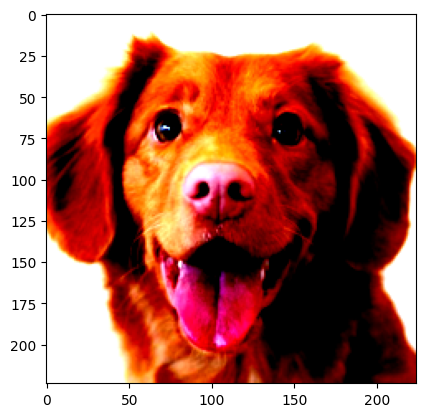

In [ ]:
numpy_array = img_t[0,:,:,:].cpu().numpy()
numpy_array_transposed = numpy_array.transpose(1, 2, 0)
plt.imshow(numpy_array_transposed)
plt.show()

In [ ]:
def scale(img):
    # Normalize the NumPy array to the range [0, 1]
    max_value = img.max()
    min_value = img.min()
    normalized_array = (img - min_value) / (max_value - min_value)
    return normalized_array

In [ ]:
def tensor_plot(img_t,index=0):
    numpy_array = img_t[index,:,:,:].cpu().numpy()
    numpy_array_transposed = numpy_array.transpose(1, 2, 0)
    numpy_array_transposed = scale(numpy_array_transposed)
    plt.imshow(numpy_array_transposed)
    plt.show()

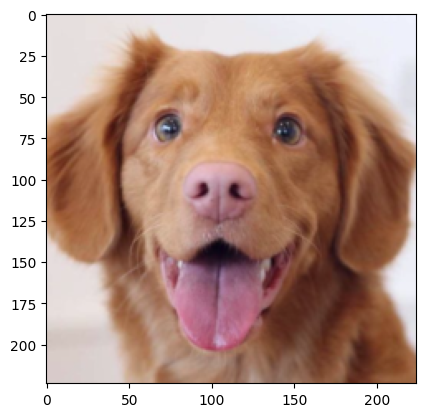

In [ ]:
tensor_plot(img_t)

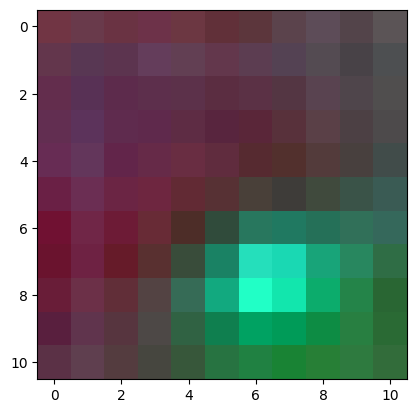

In [ ]:
tensor_plot(w0,0)

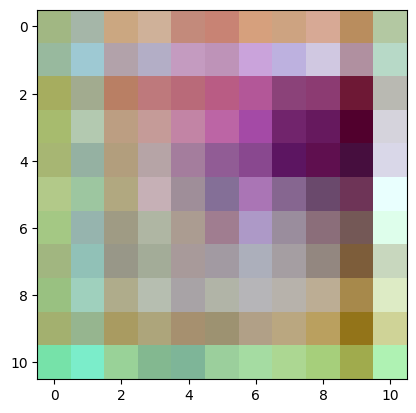

In [ ]:
tensor_plot(w0,1)

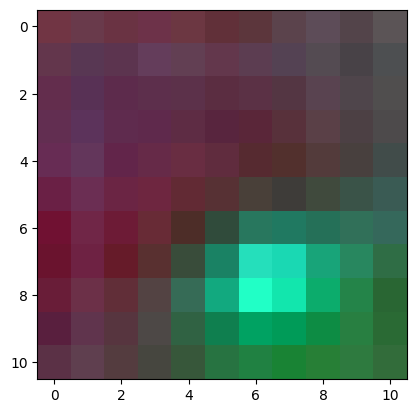

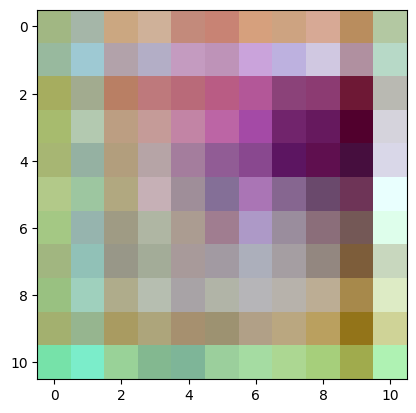

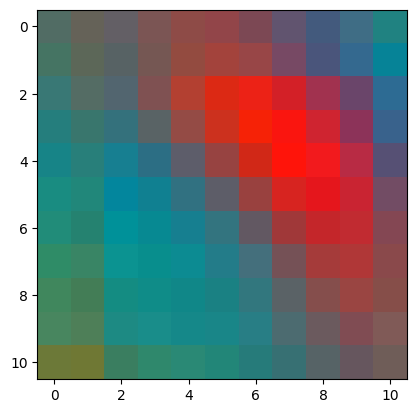

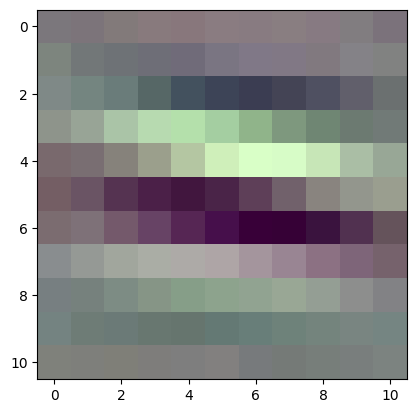

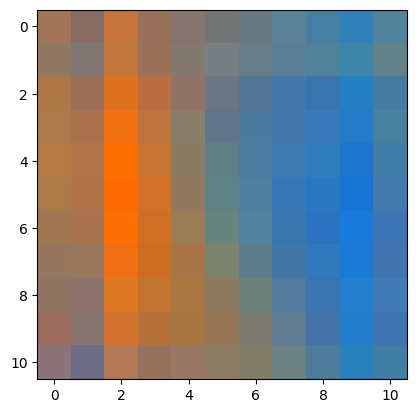

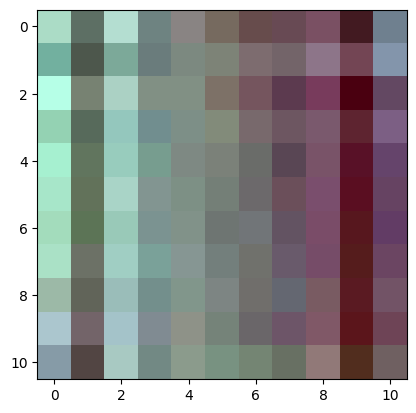

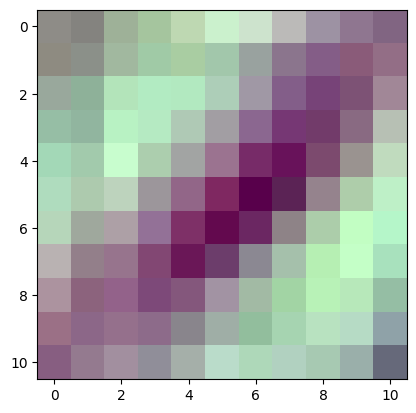

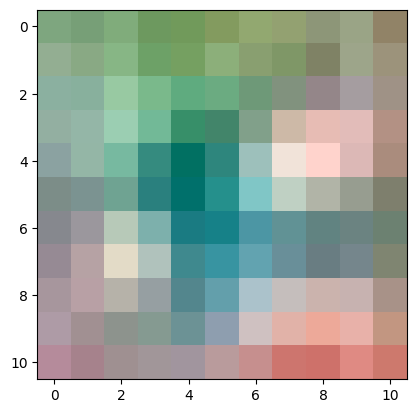

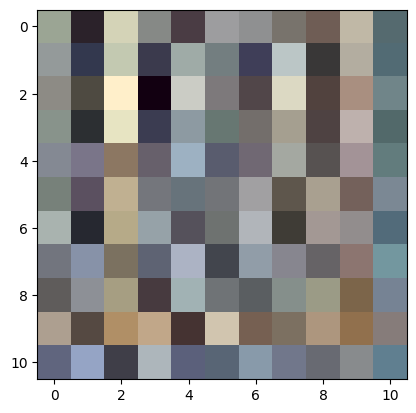

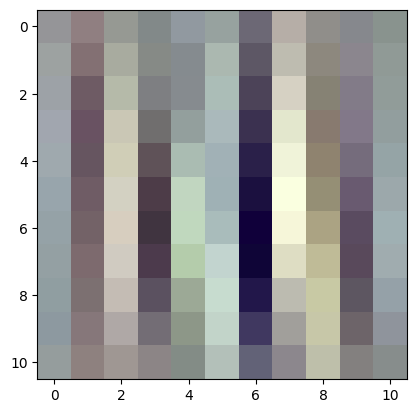

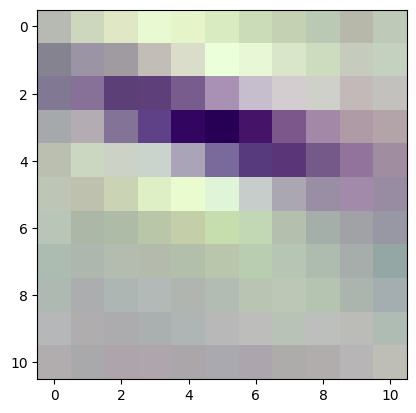

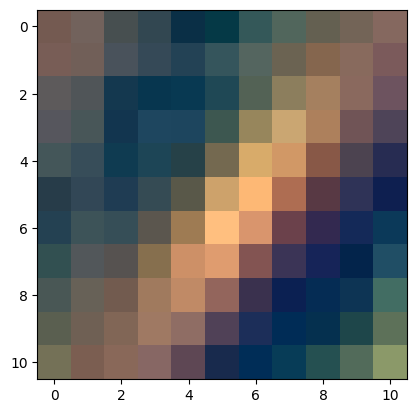

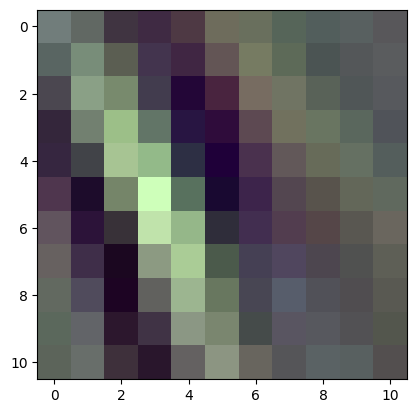

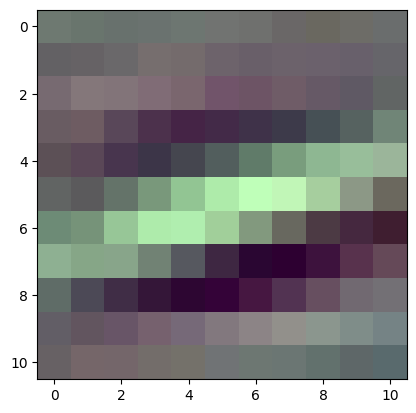

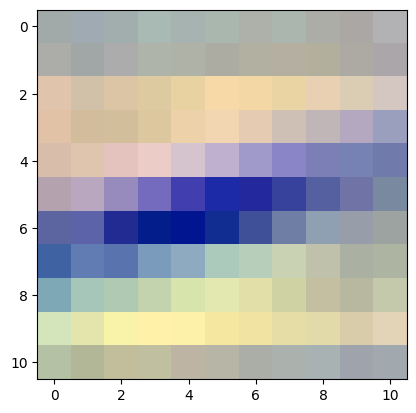

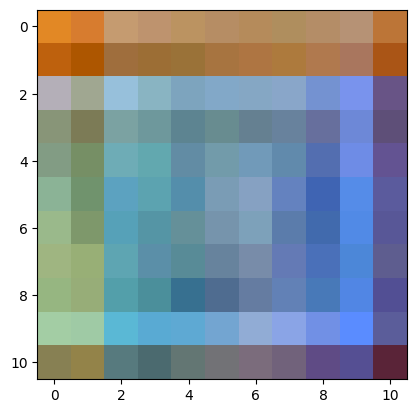

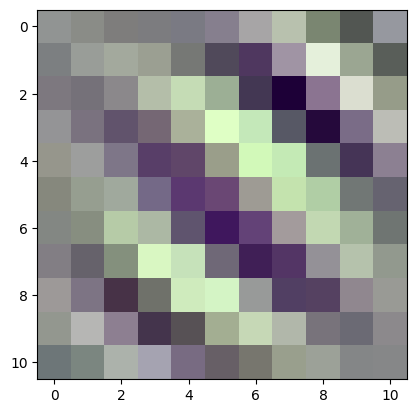

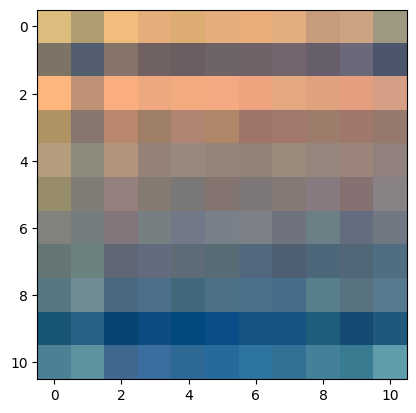

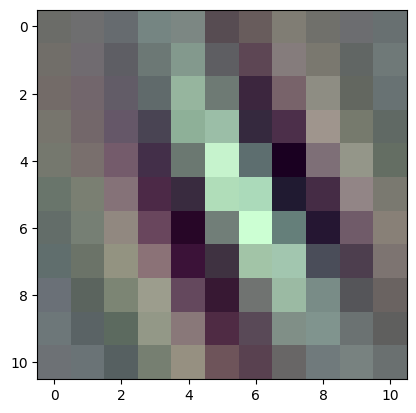

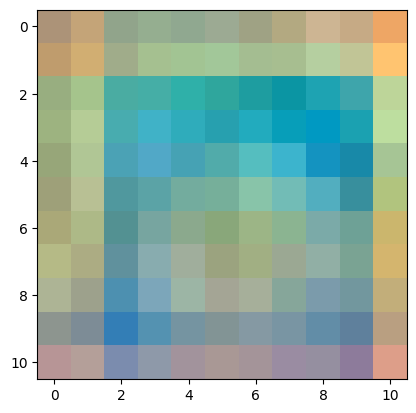

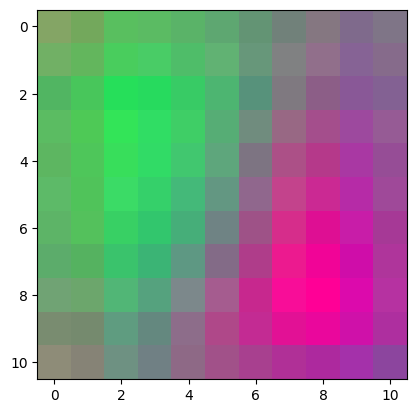

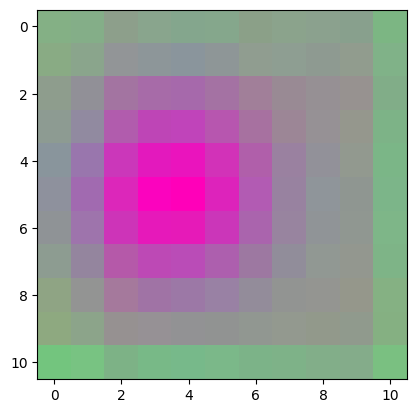

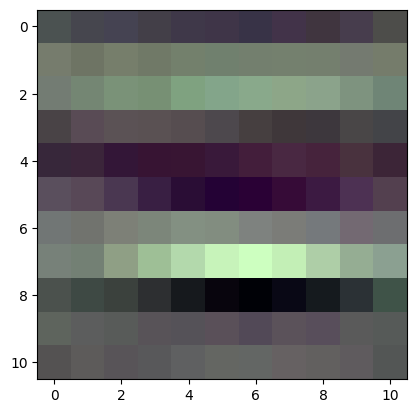

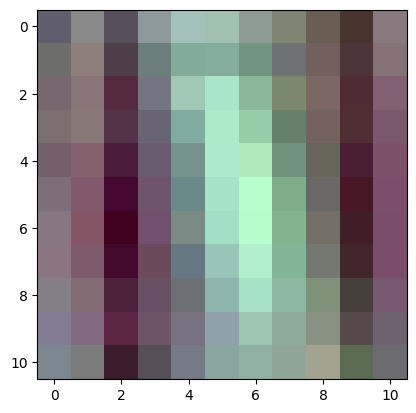

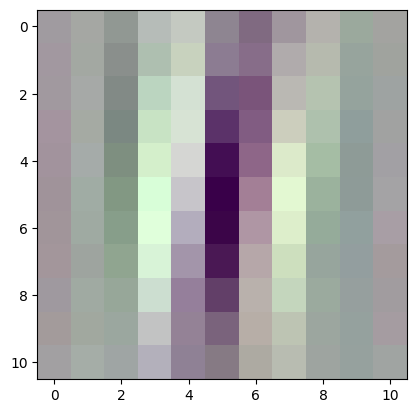

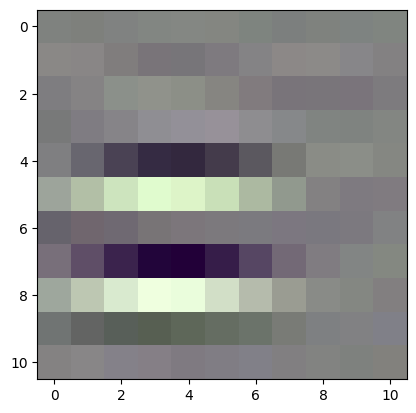

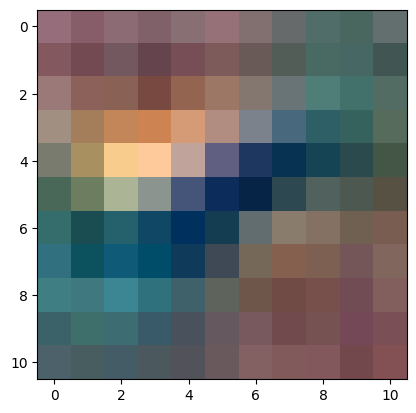

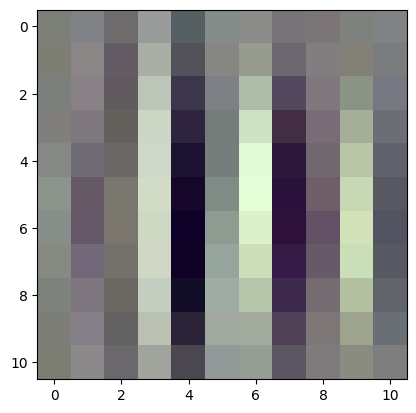

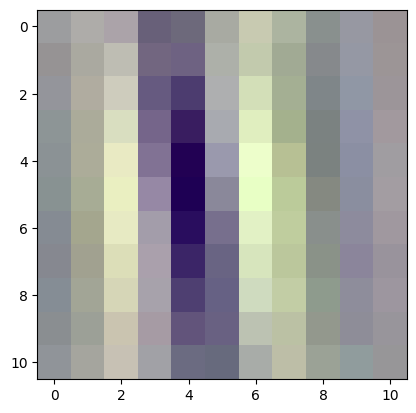

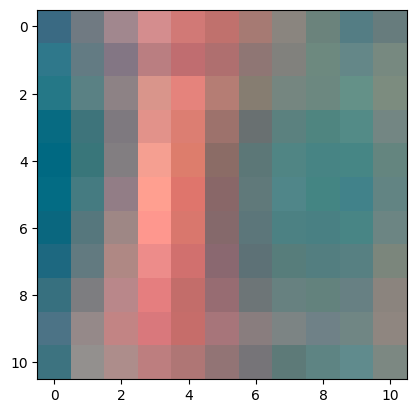

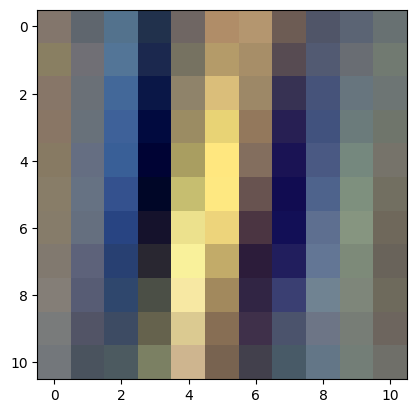

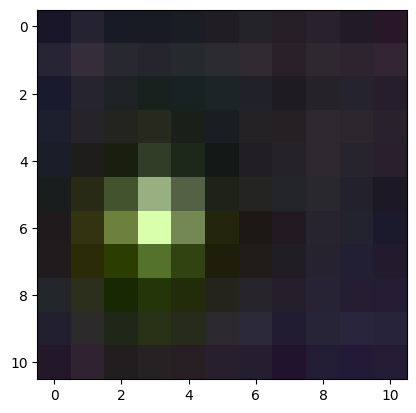

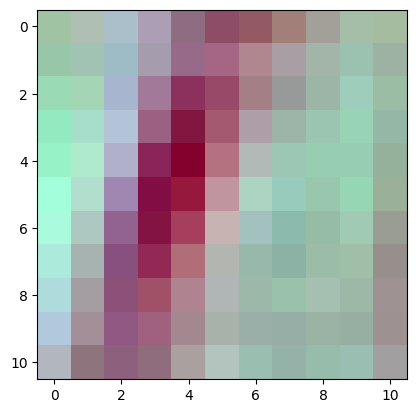

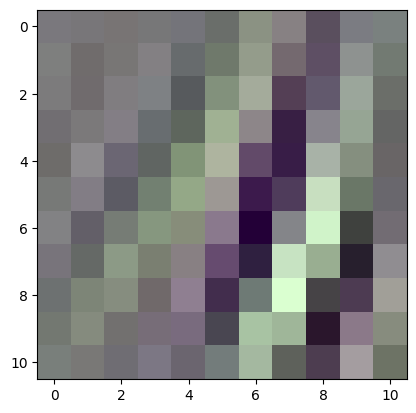

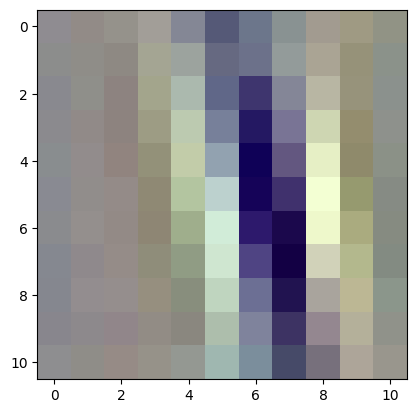

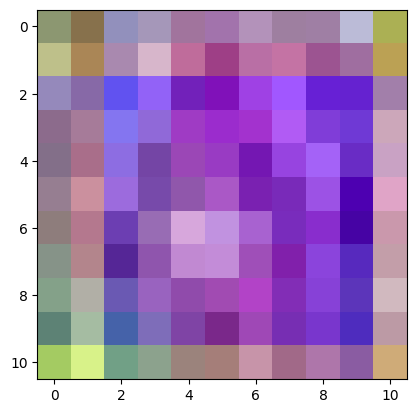

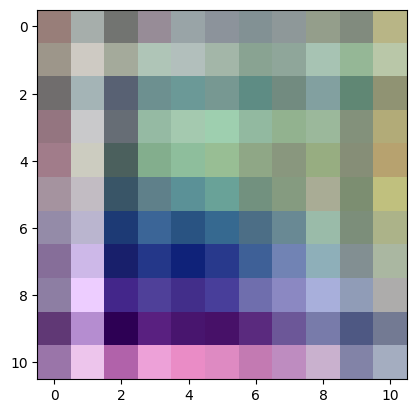

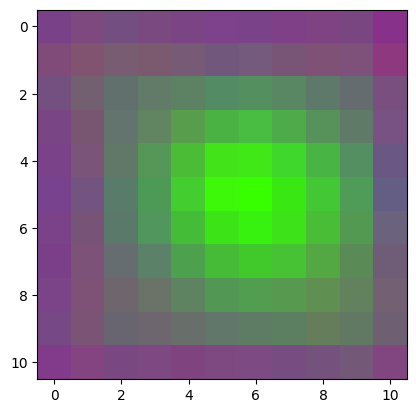

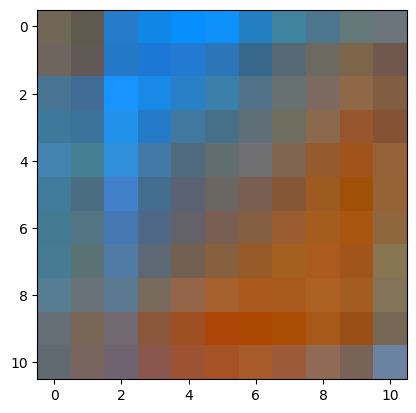

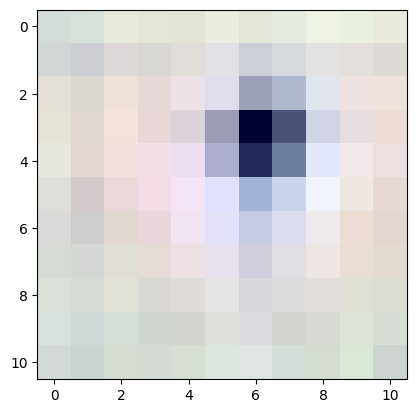

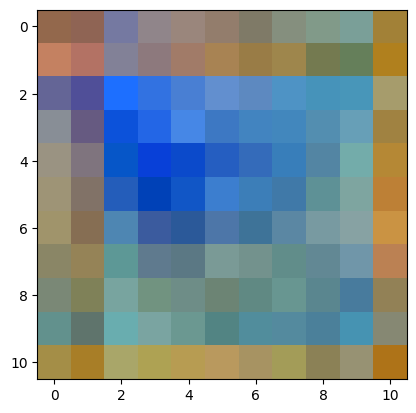

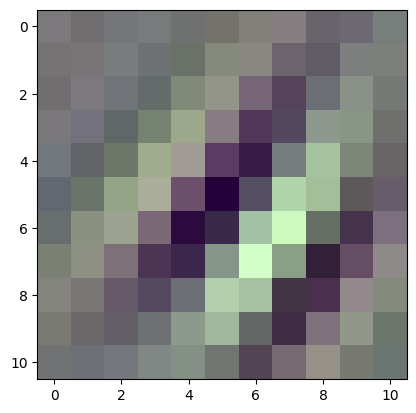

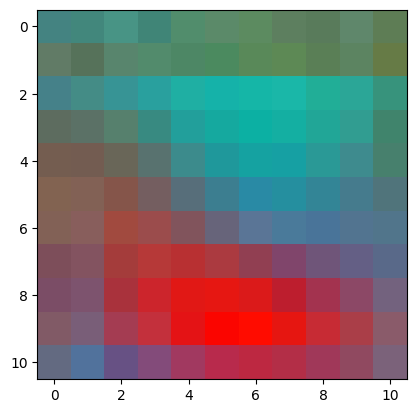

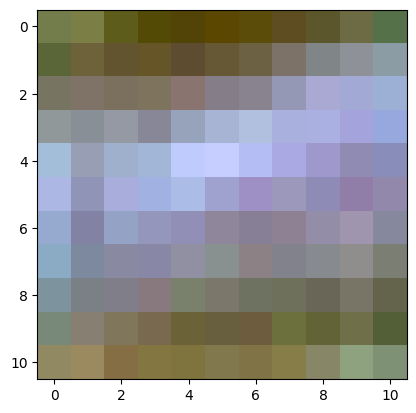

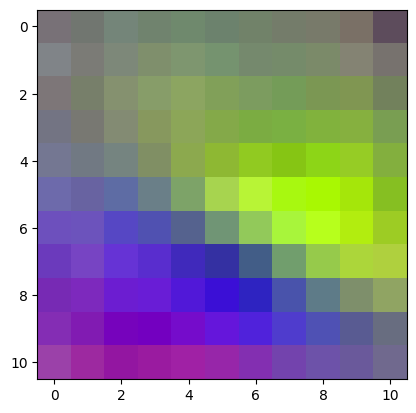

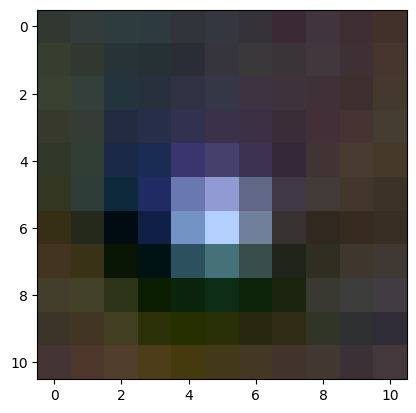

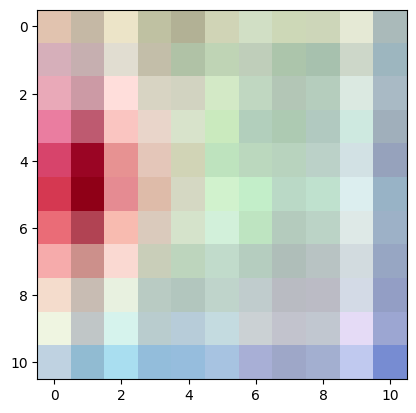

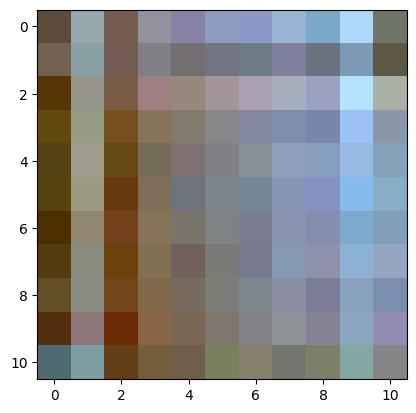

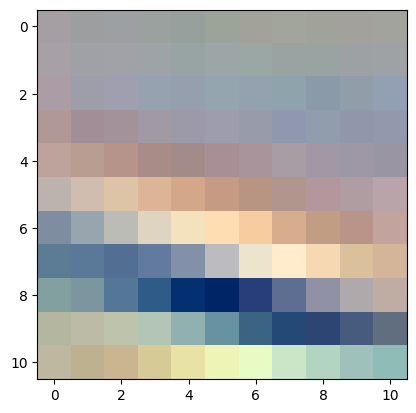

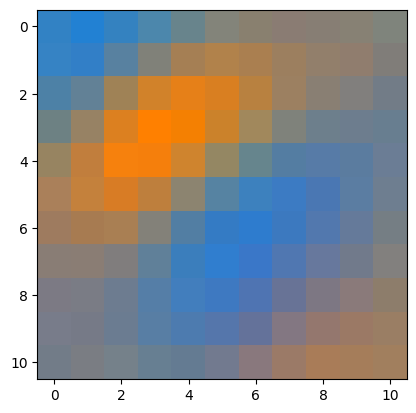

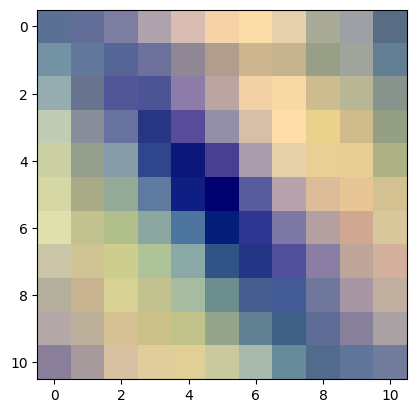

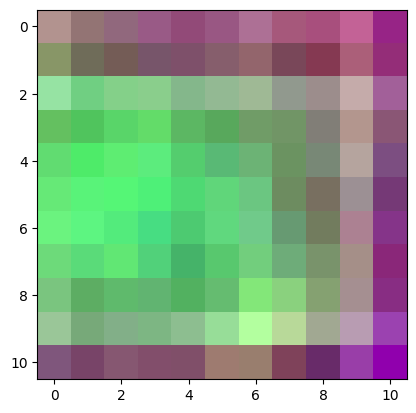

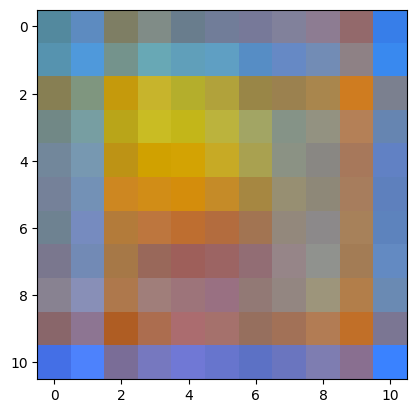

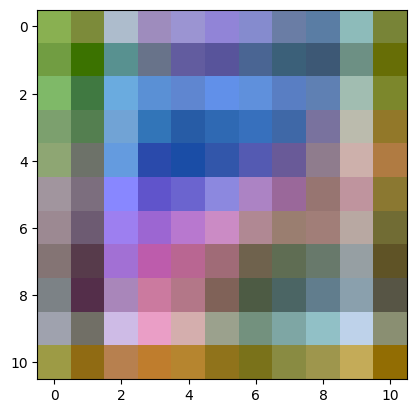

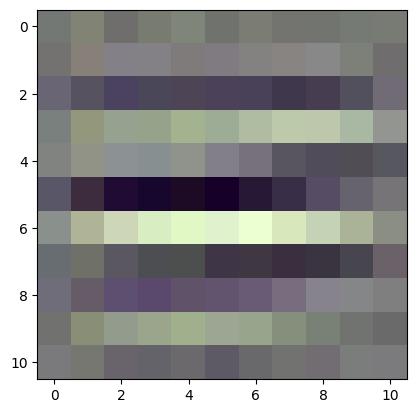

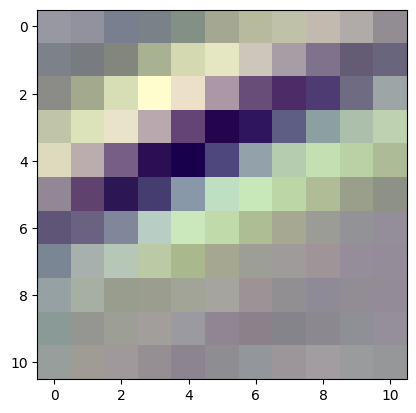

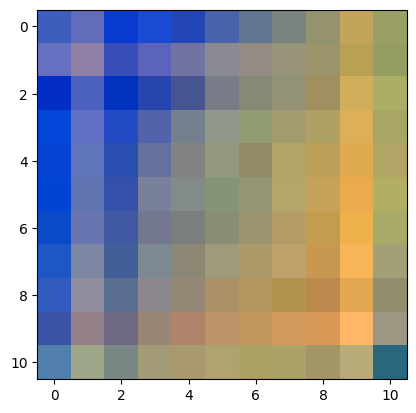

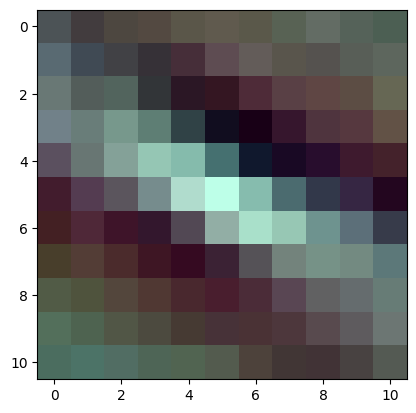

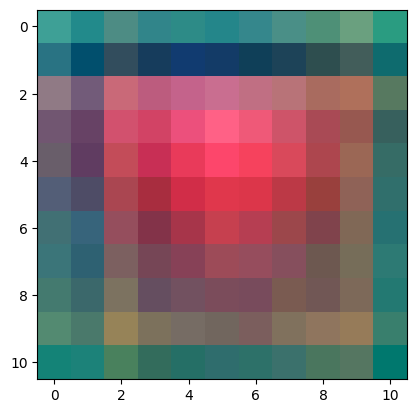

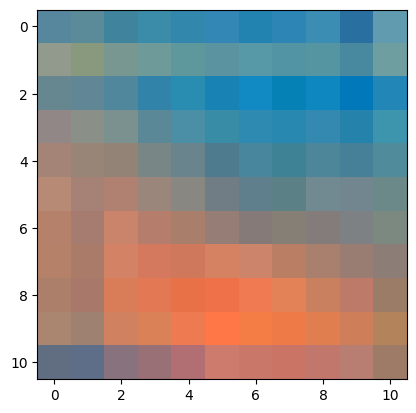

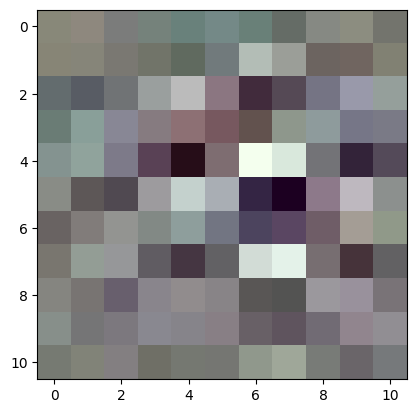

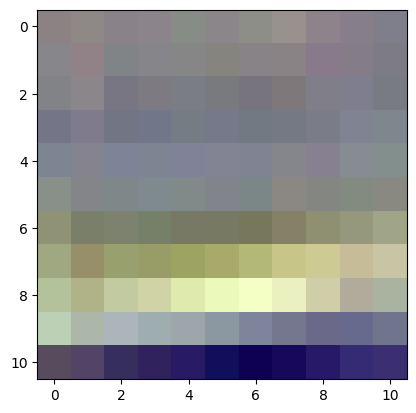

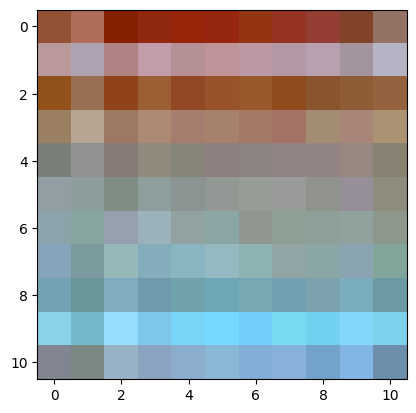

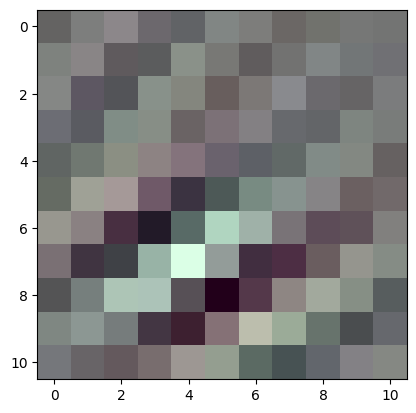

In [ ]:
for i in range(64):
    tensor_plot(w0,i)

In [ ]:
w0.shape

torch.Size([64, 3, 11, 11])

In [ ]:
img_t[0,:,:,:]

tensor([[[ 1.7352,  1.7352,  1.7352,  ...,  1.9064,  1.9064,  1.9064],
         [ 1.7352,  1.7352,  1.7352,  ...,  1.9064,  1.9064,  1.9064],
         [ 1.7352,  1.7352,  1.7352,  ...,  1.9064,  1.9064,  1.9064],
         ...,
         [ 1.5125,  1.5125,  1.5125,  ...,  0.5193,  0.5364,  0.5536],
         [ 1.4954,  1.4954,  1.4954,  ...,  0.5193,  0.5364,  0.5364],
         [ 1.4612,  1.4612,  1.4612,  ...,  0.5193,  0.5193,  0.5022]],

        [[ 1.6232,  1.6232,  1.6232,  ...,  1.9384,  1.9384,  1.9384],
         [ 1.6232,  1.6232,  1.6232,  ...,  1.9384,  1.9384,  1.9384],
         [ 1.6232,  1.6232,  1.6232,  ...,  1.9384,  1.9384,  1.9384],
         ...,
         [ 1.2906,  1.2906,  1.2906,  ..., -0.3550, -0.3550, -0.3550],
         [ 1.3081,  1.3081,  1.3081,  ..., -0.3550, -0.3550, -0.3725],
         [ 1.3081,  1.3081,  1.3081,  ..., -0.3725, -0.3550, -0.3725]],

        [[ 1.6117,  1.6117,  1.6117,  ...,  2.1171,  2.1171,  2.1171],
         [ 1.6117,  1.6117,  1.6117,  ...,  2

In [ ]:
f0 = F.conv2d(img_t, w0, stride=4, padding=2)

In [ ]:
f0.shape

torch.Size([1, 64, 55, 55])

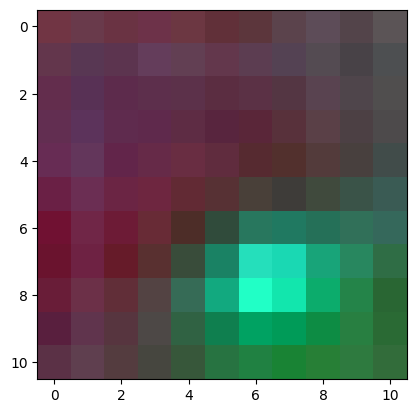

In [ ]:
tensor_plot(w0,0)

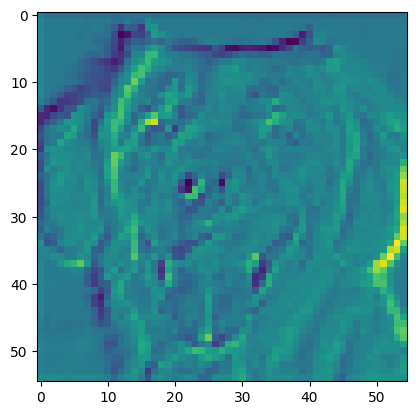

In [ ]:
i = 0
plt.imshow(f0[0,i,:,:].cpu().numpy())

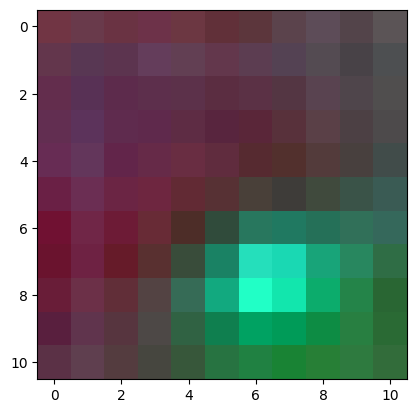

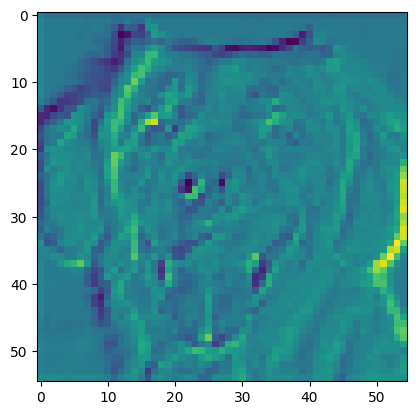

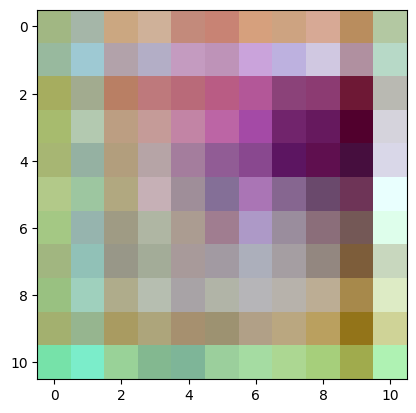

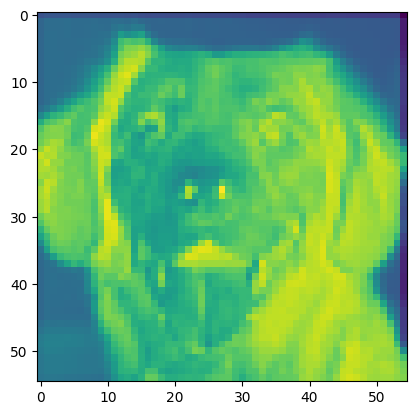

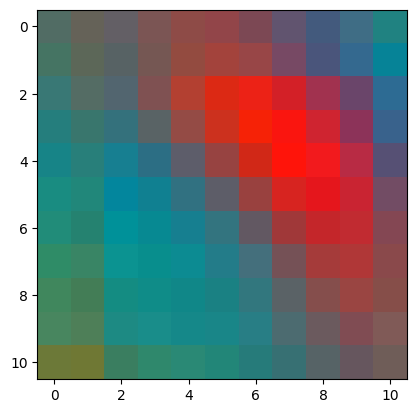

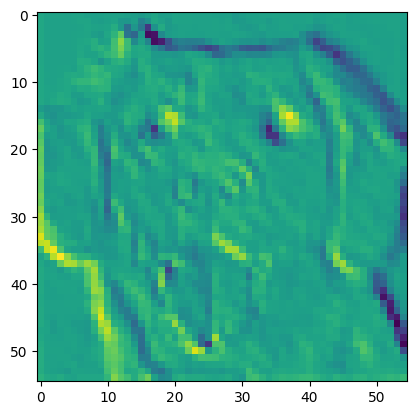

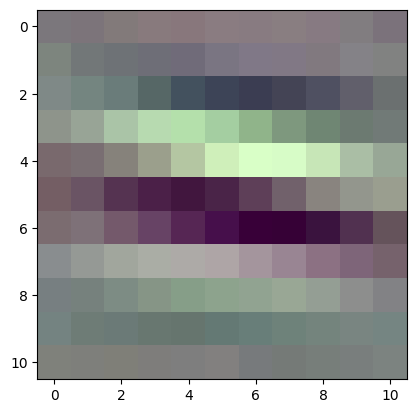

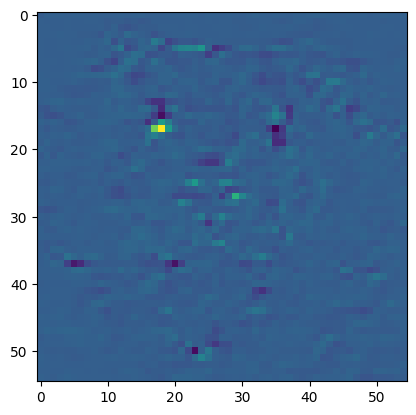

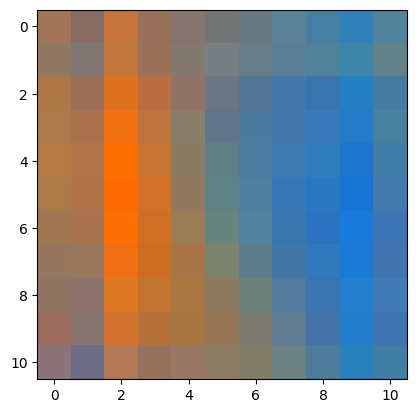

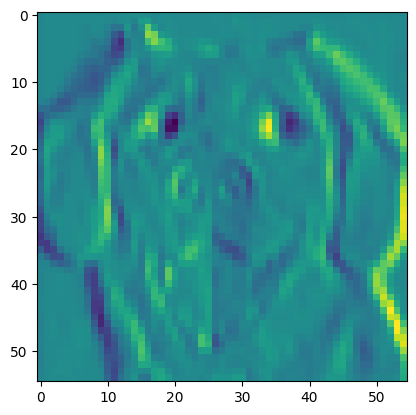

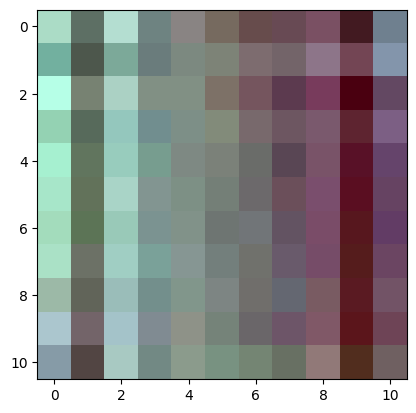

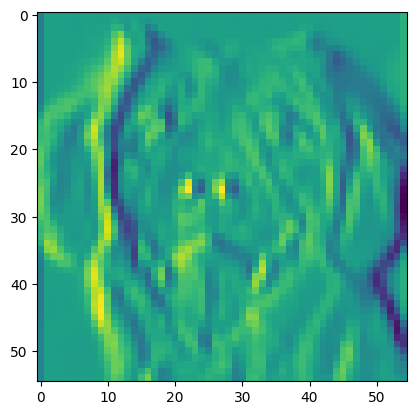

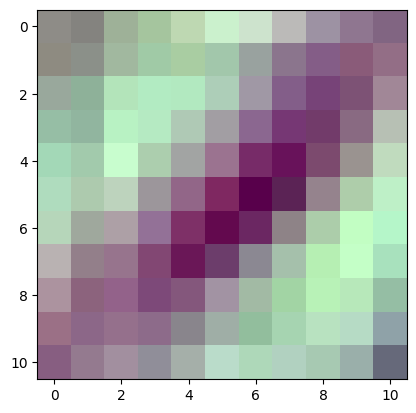

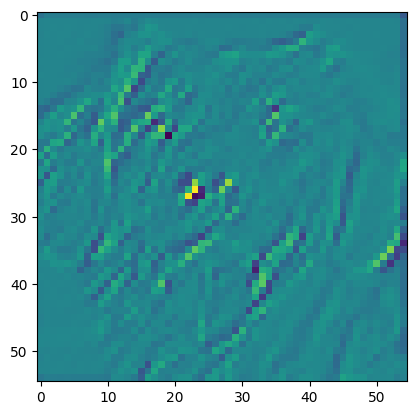

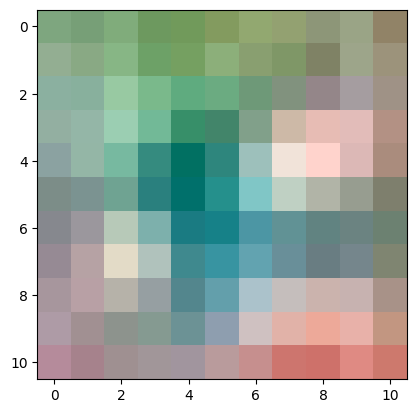

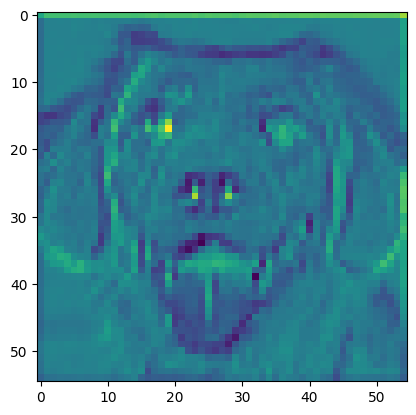

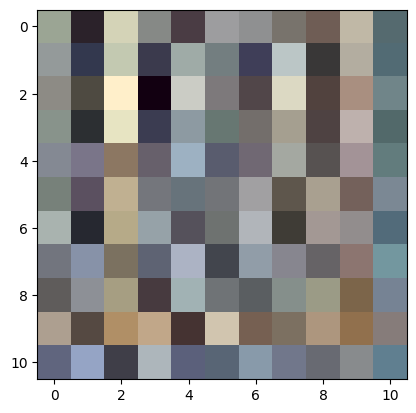

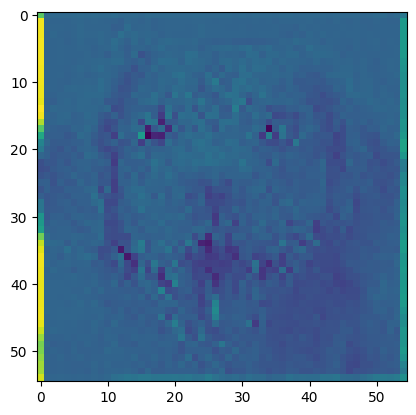

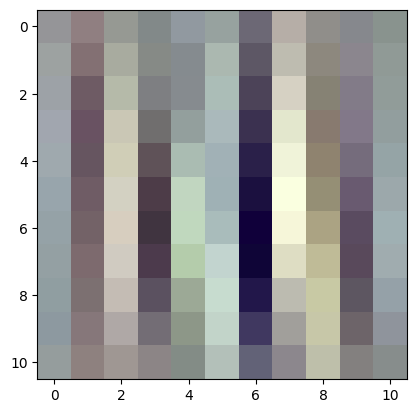

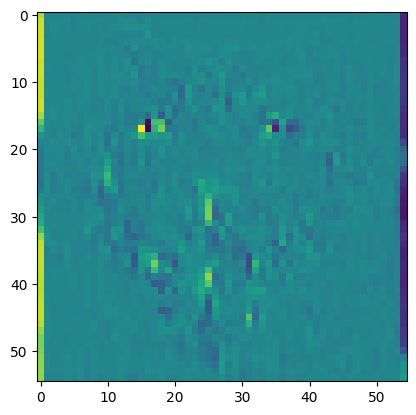

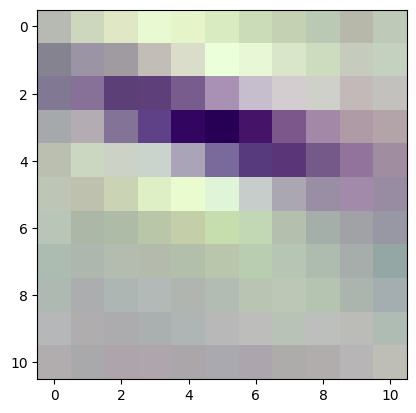

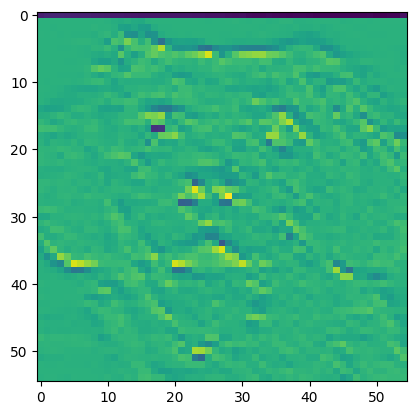

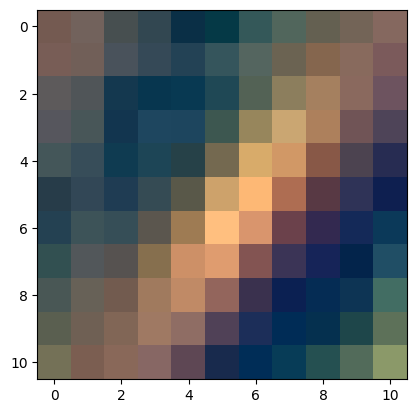

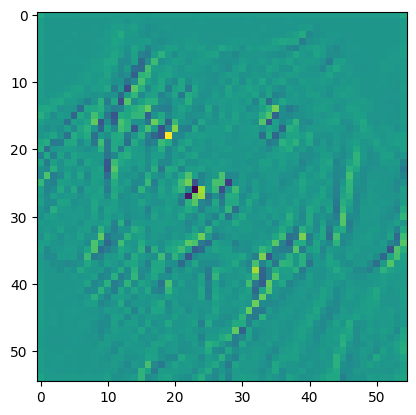

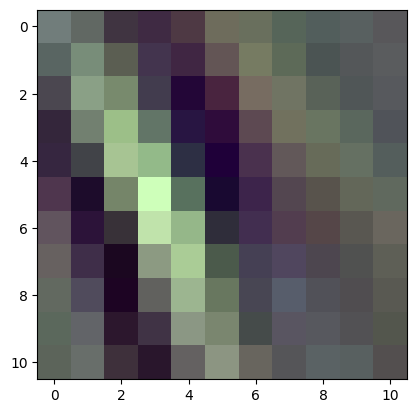

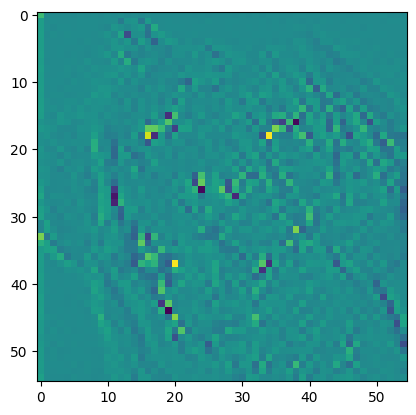

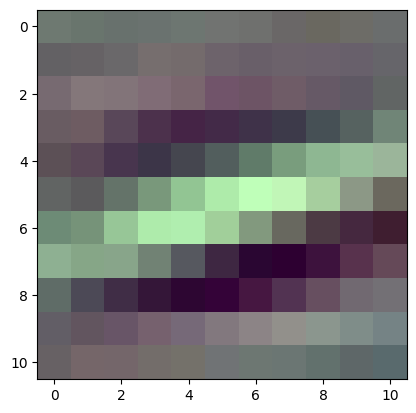

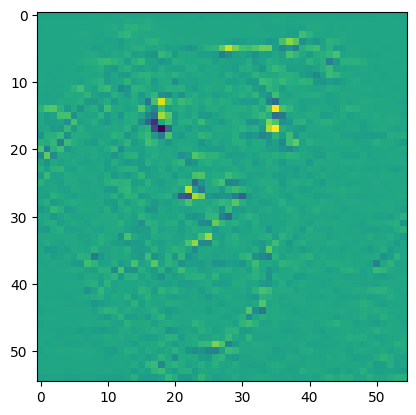

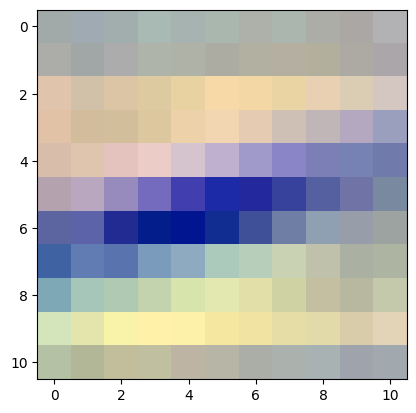

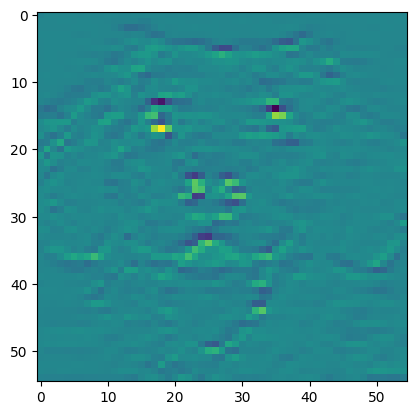

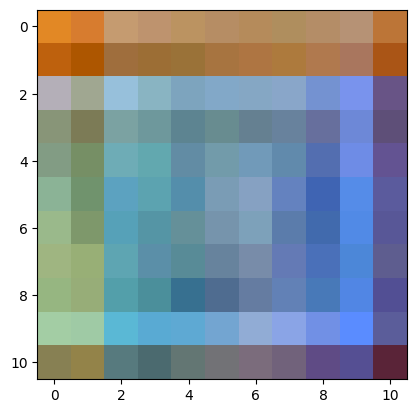

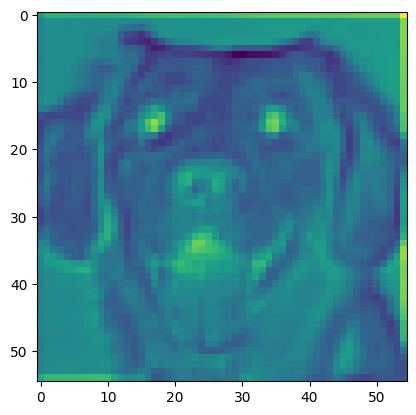

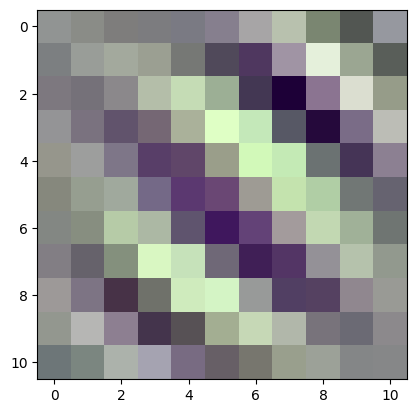

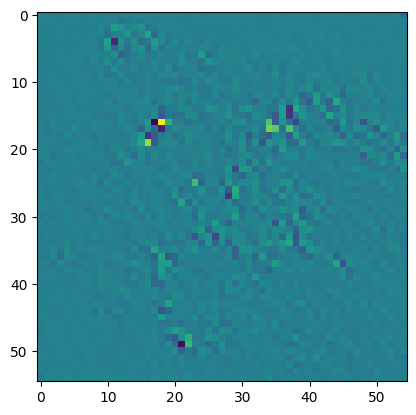

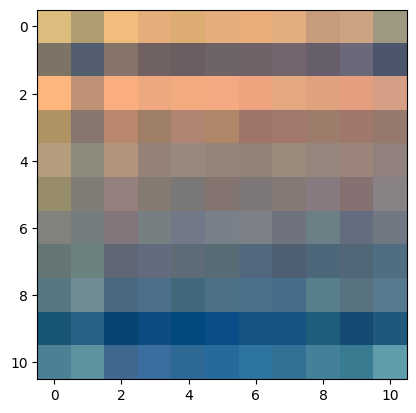

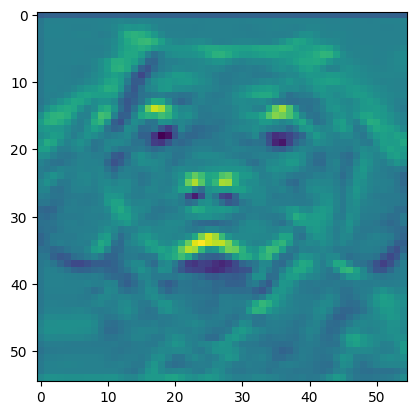

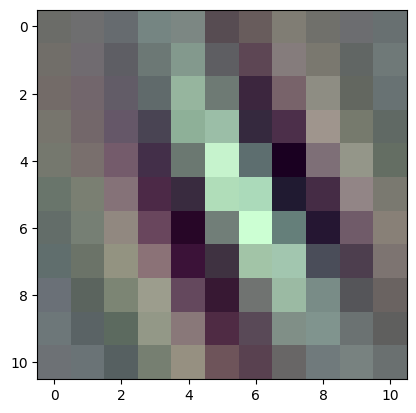

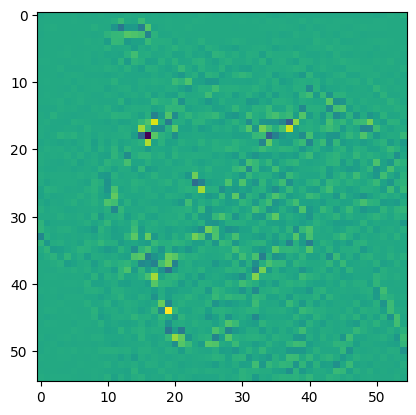

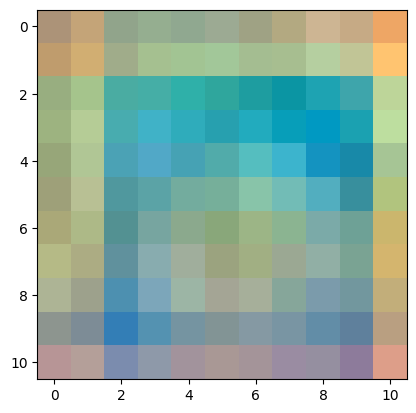

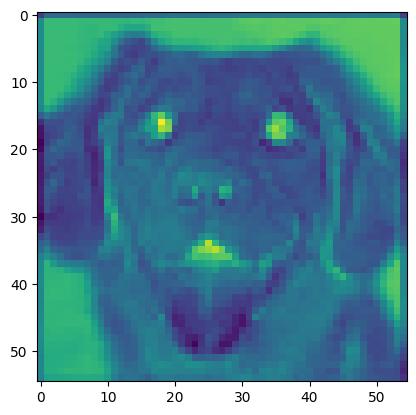

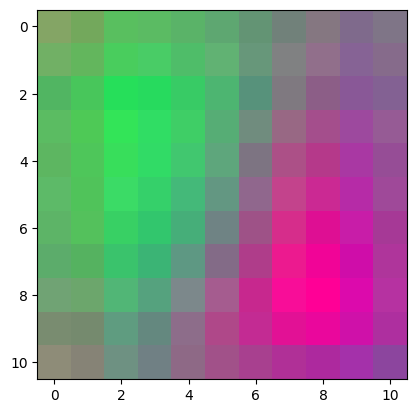

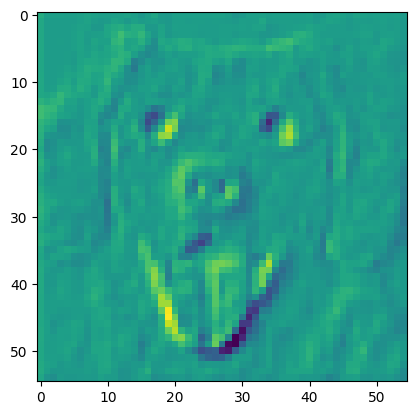

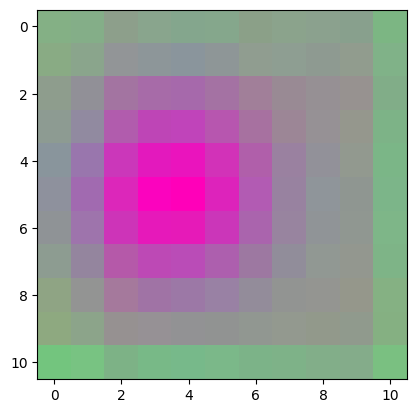

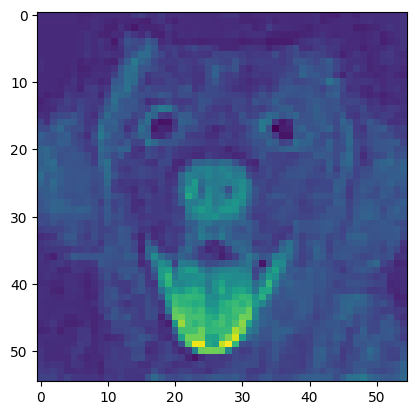

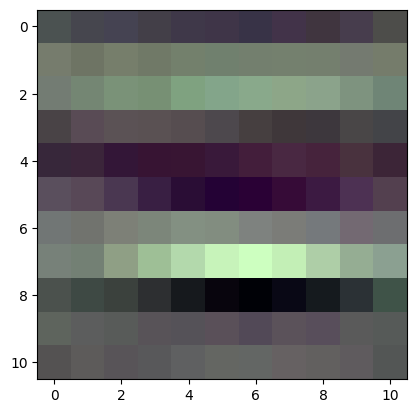

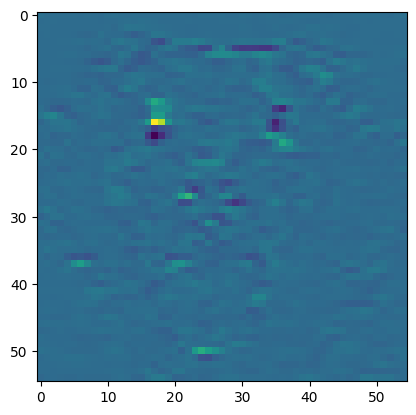

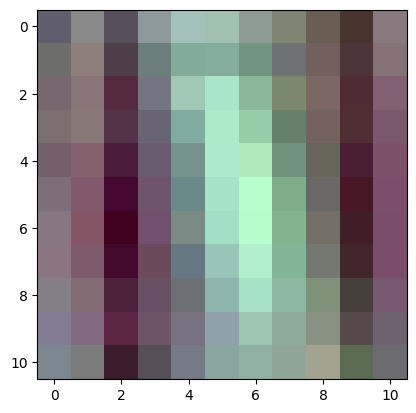

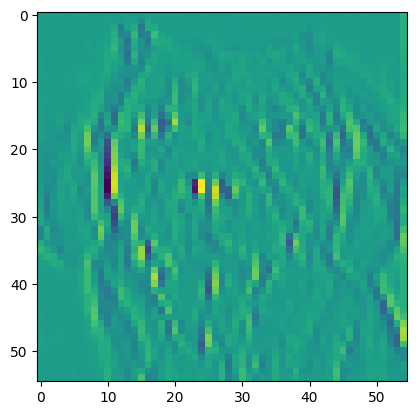

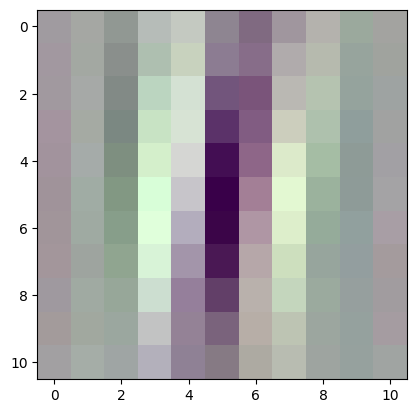

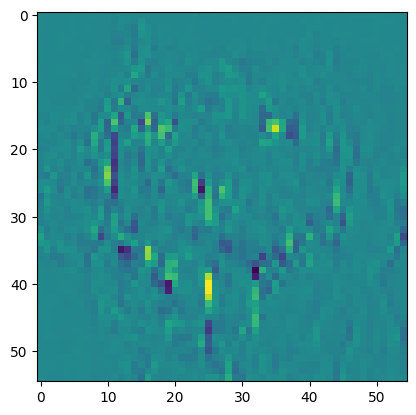

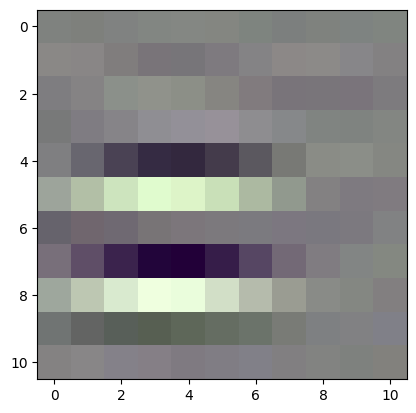

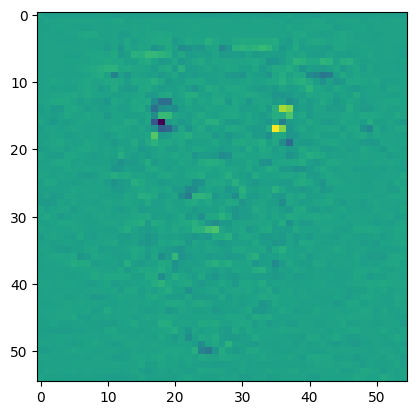

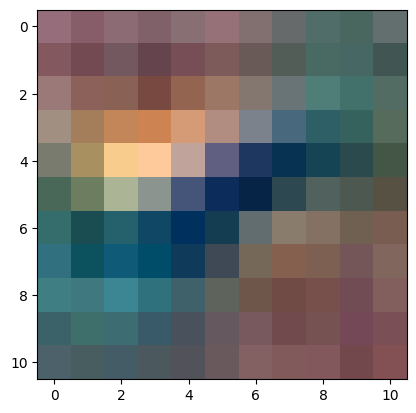

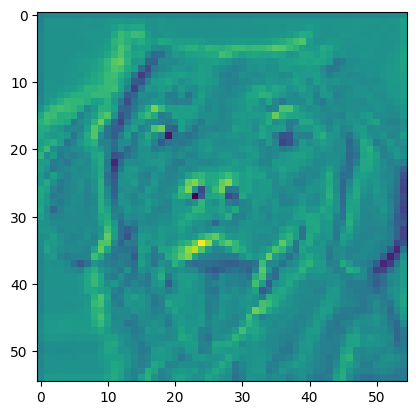

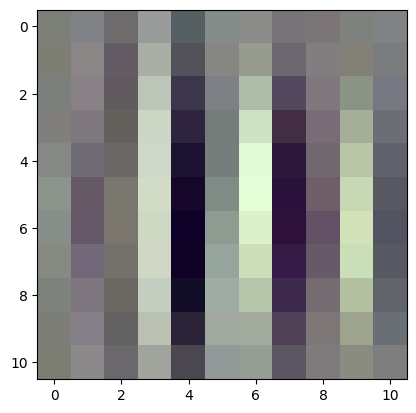

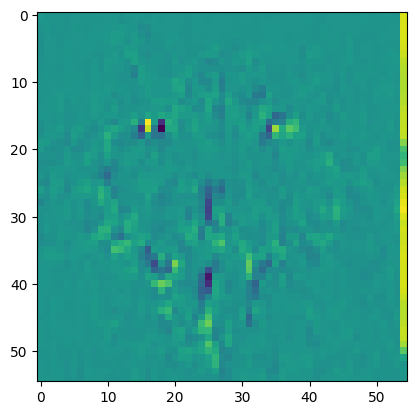

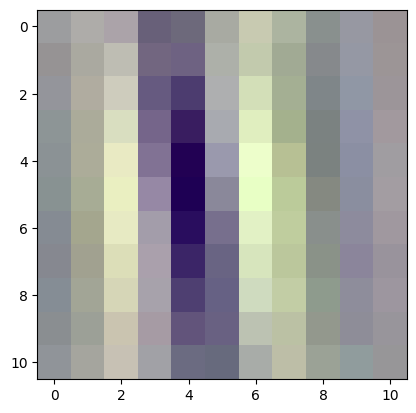

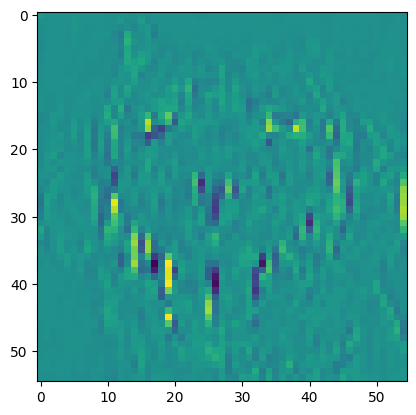

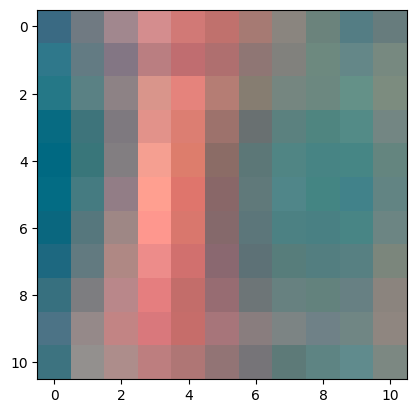

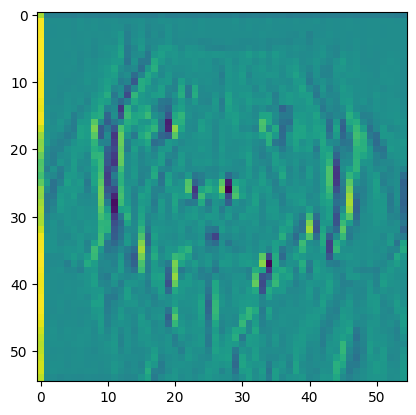

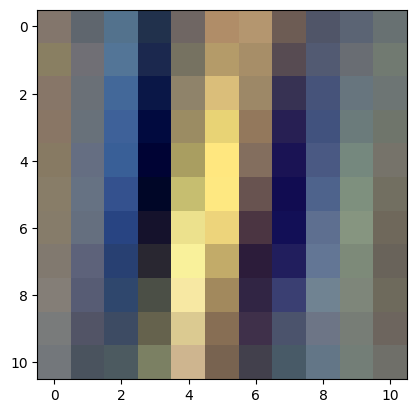

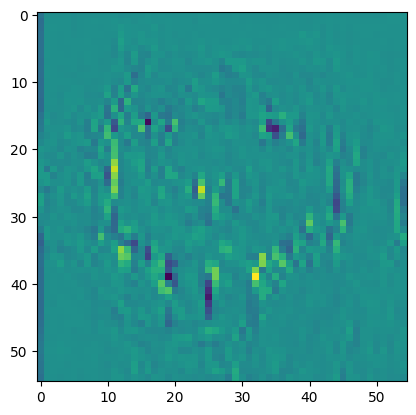

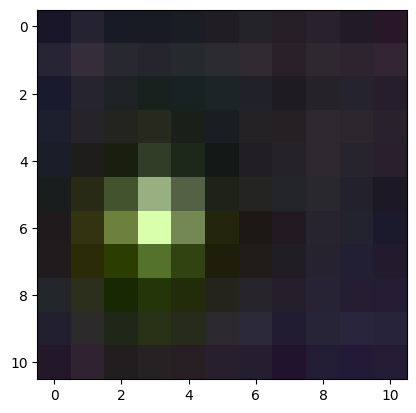

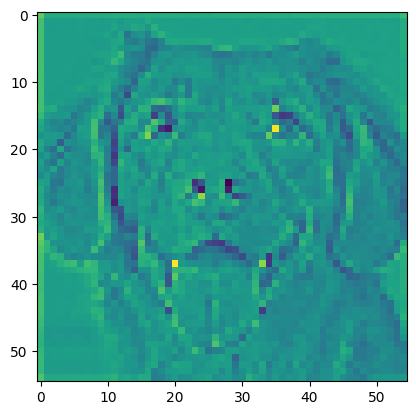

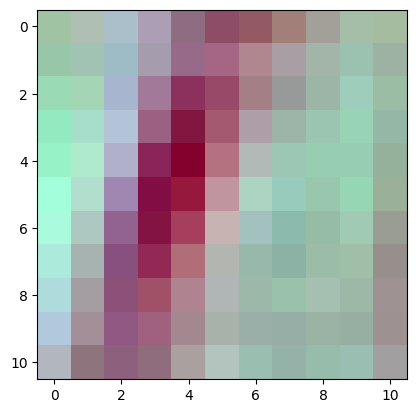

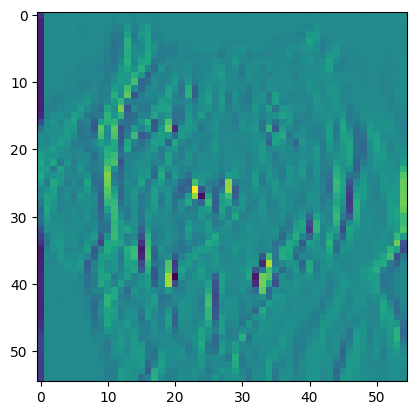

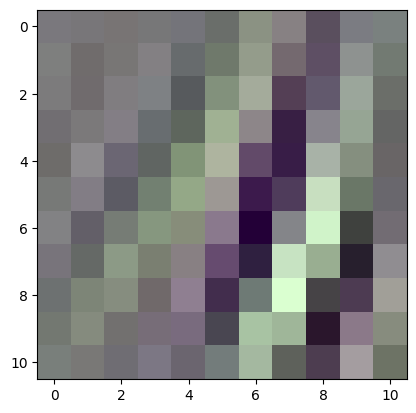

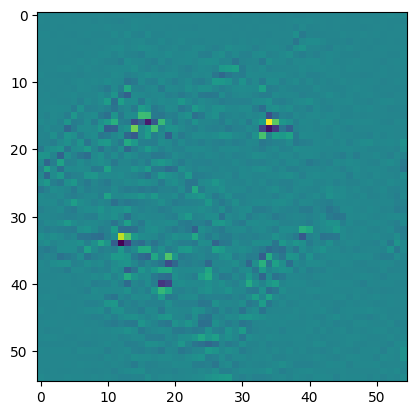

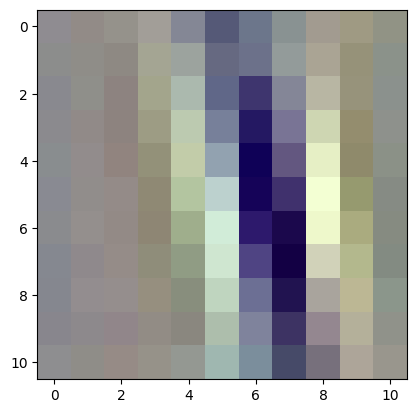

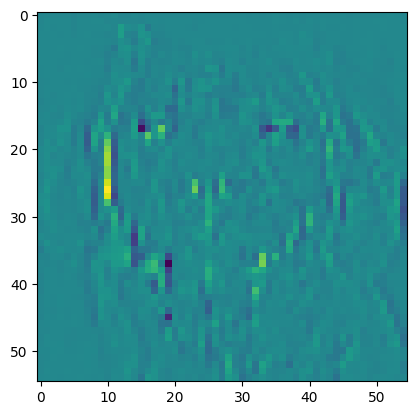

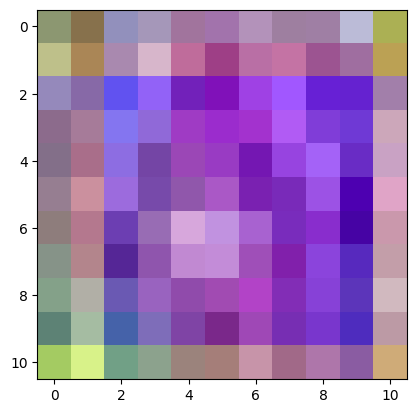

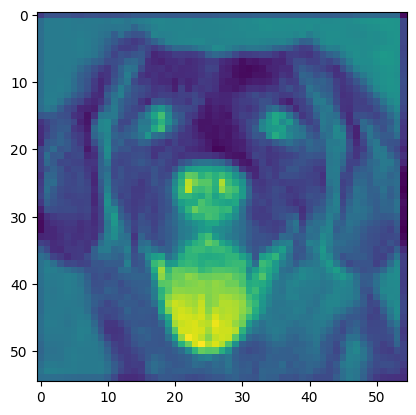

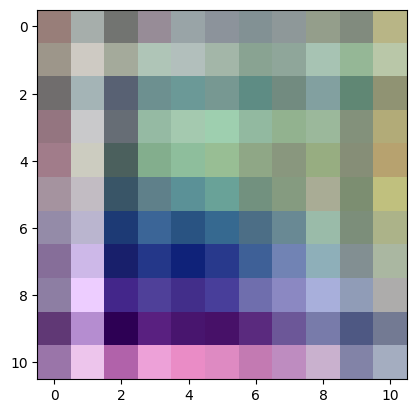

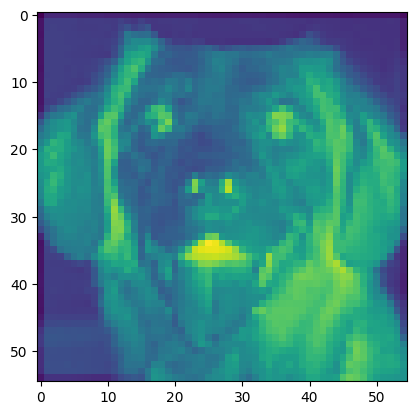

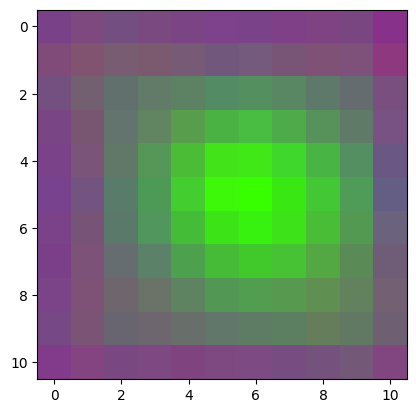

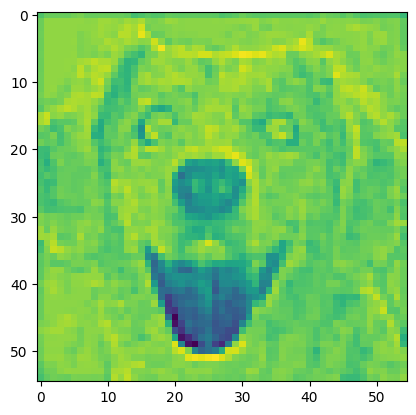

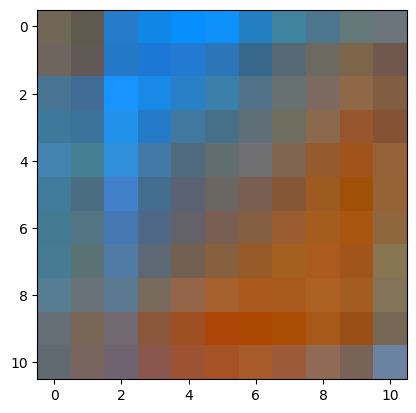

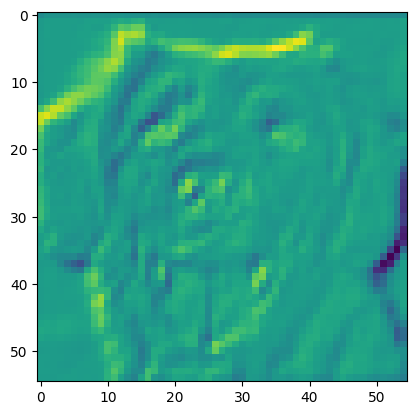

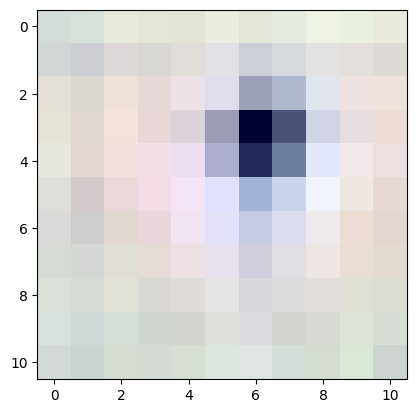

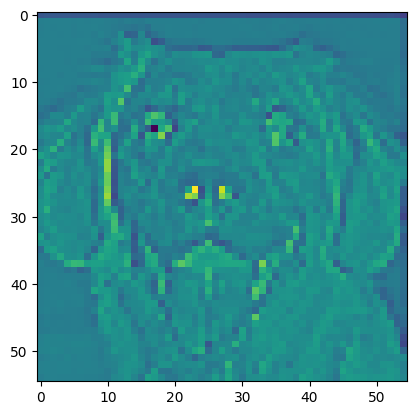

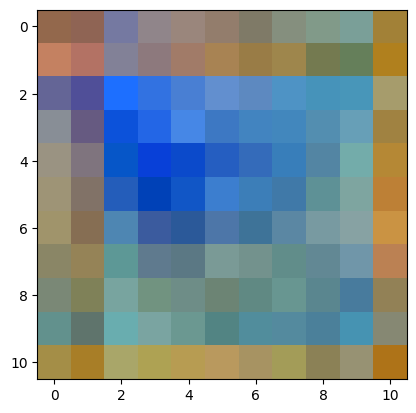

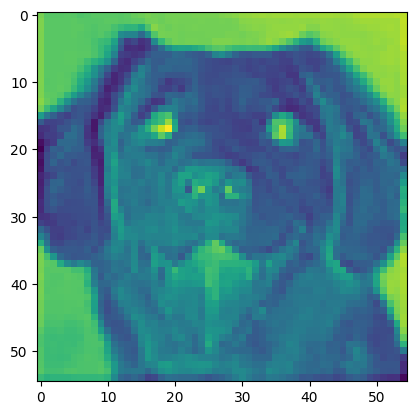

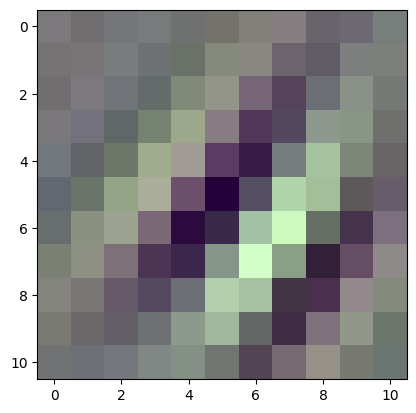

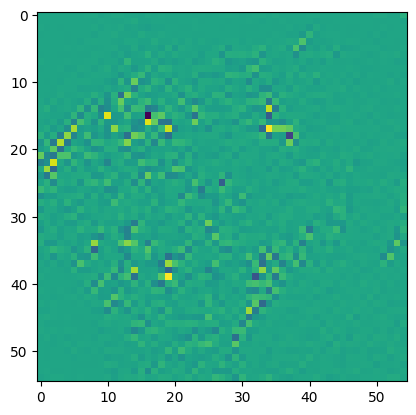

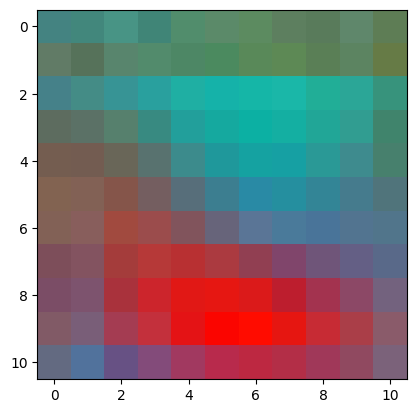

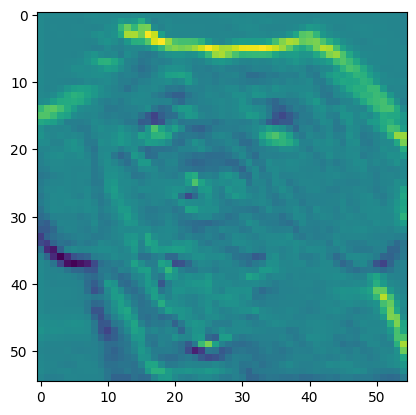

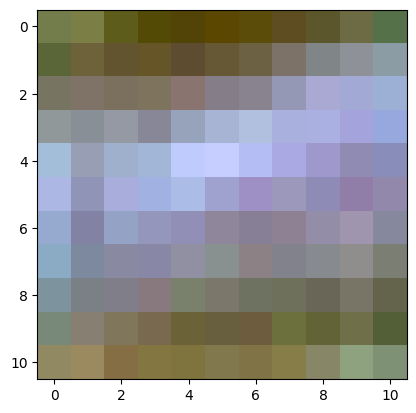

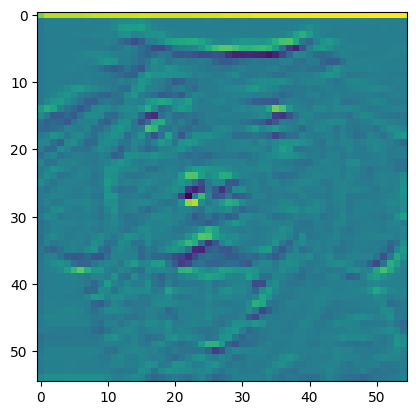

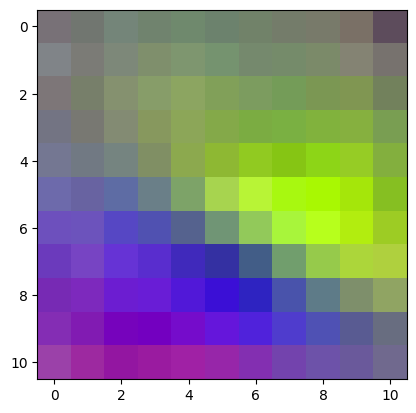

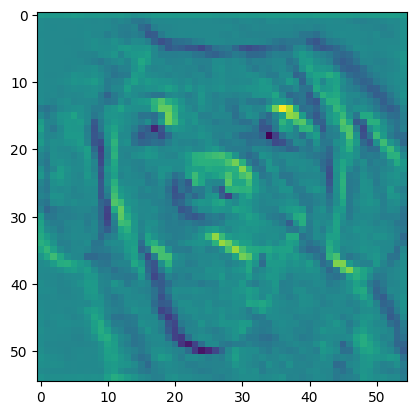

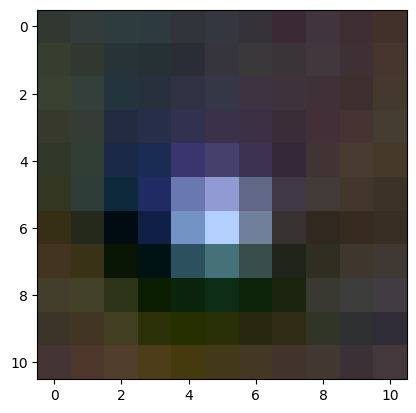

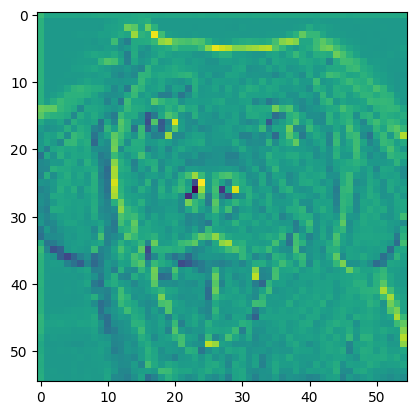

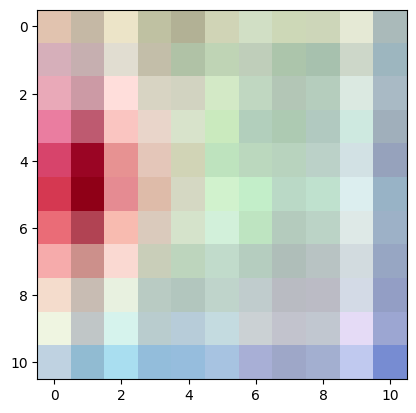

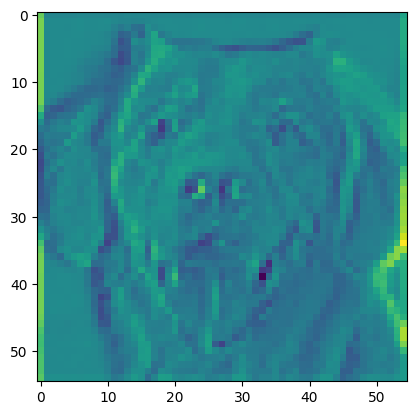

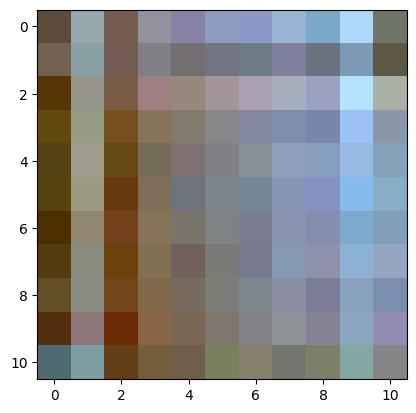

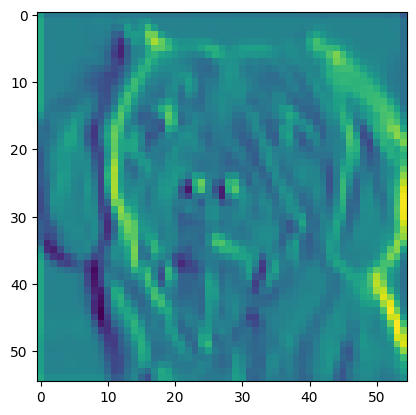

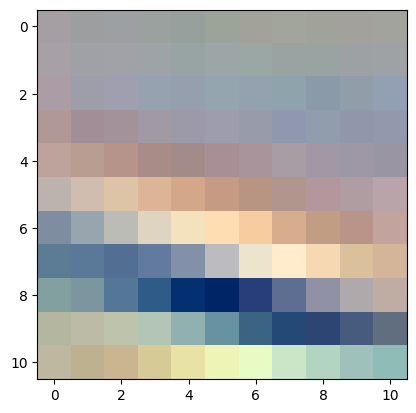

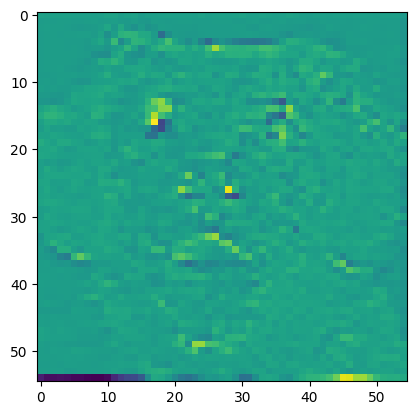

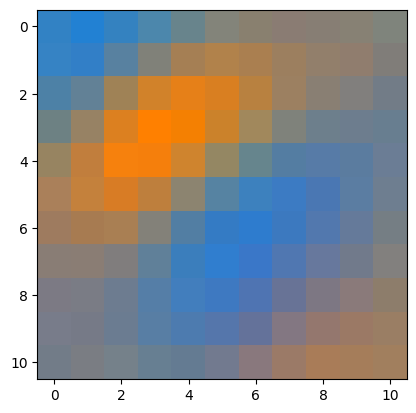

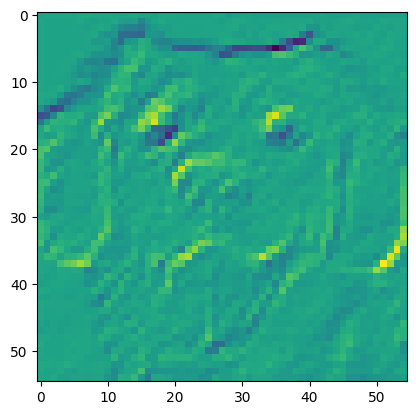

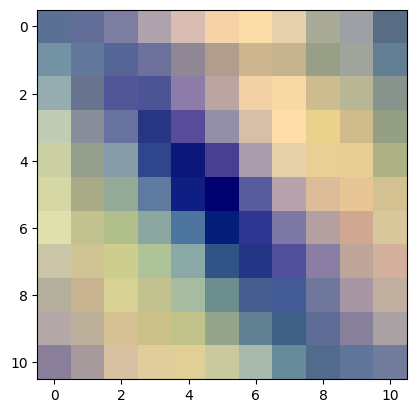

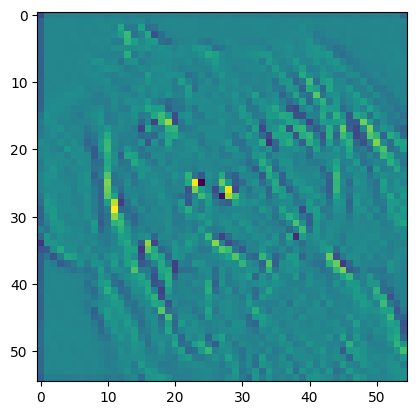

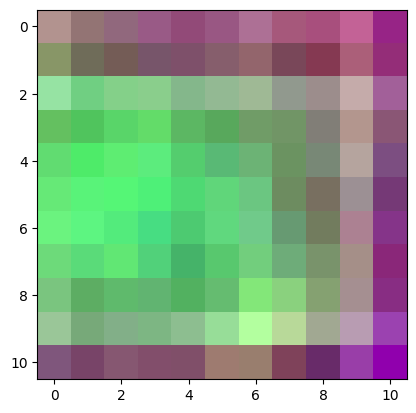

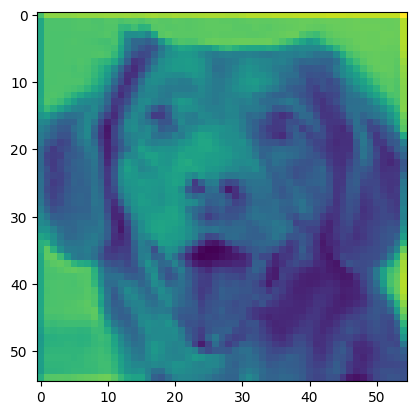

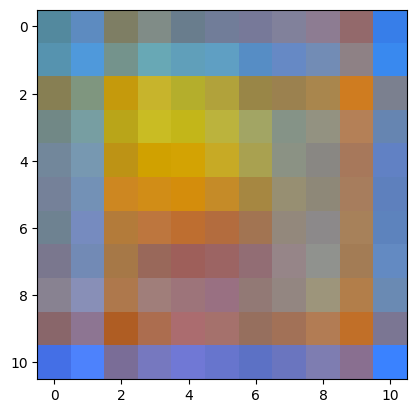

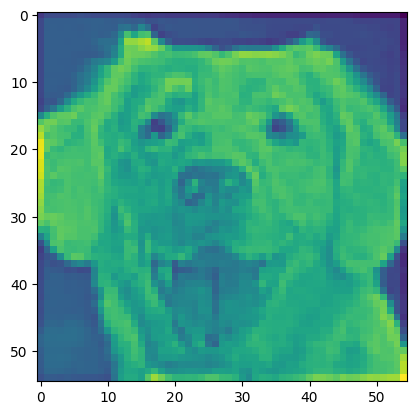

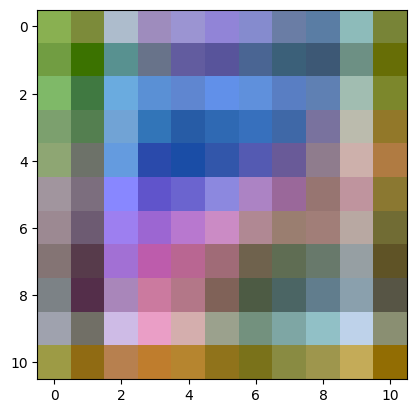

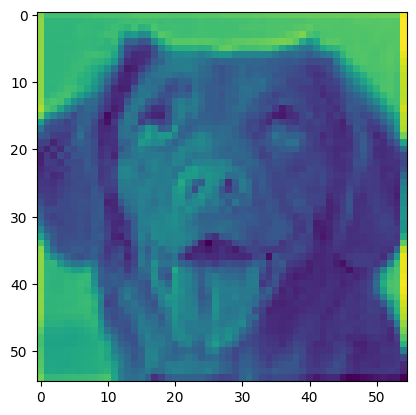

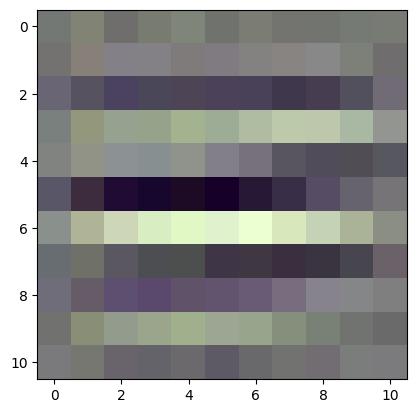

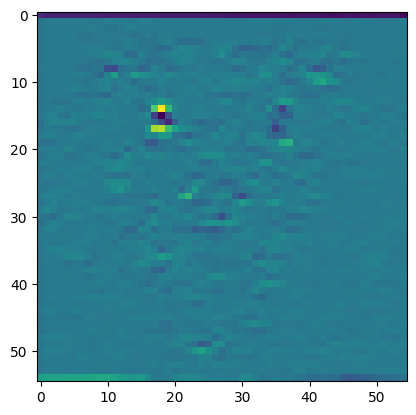

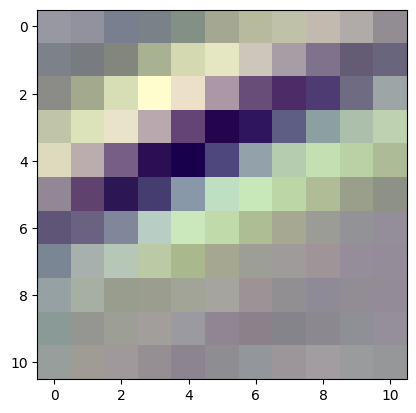

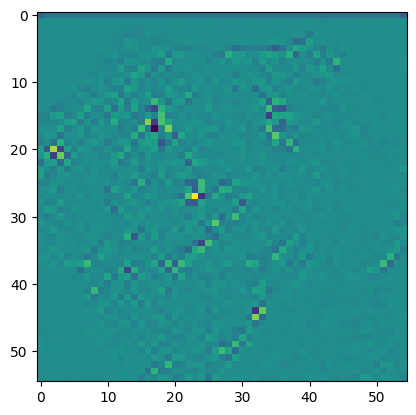

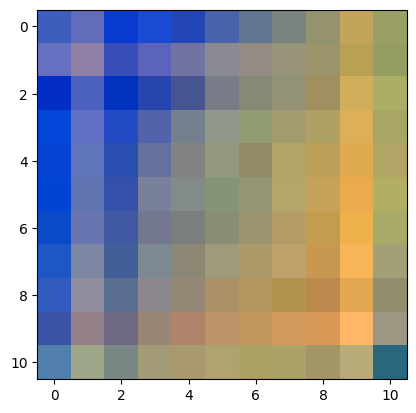

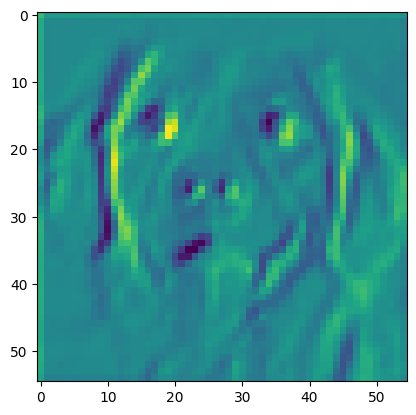

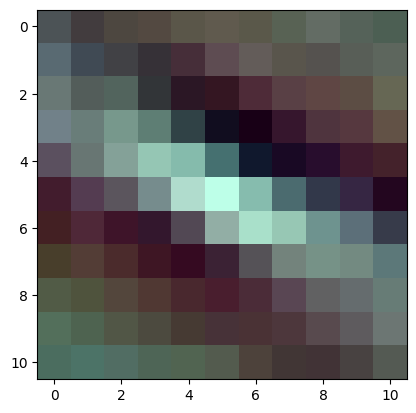

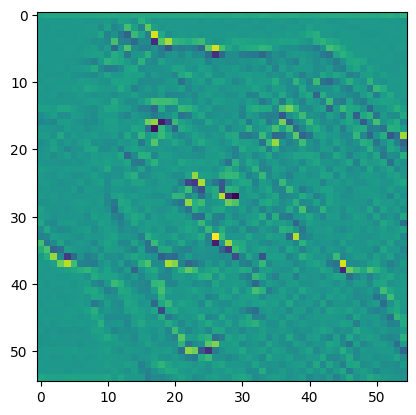

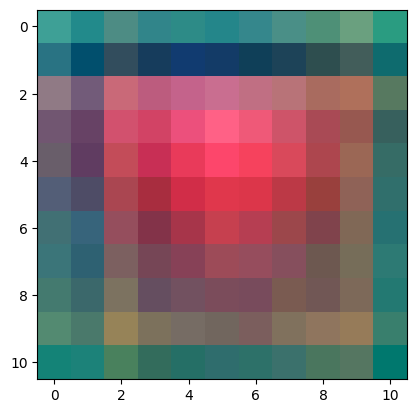

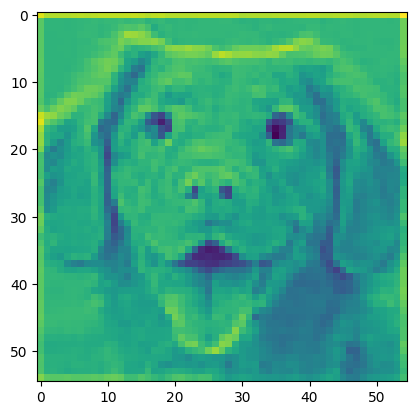

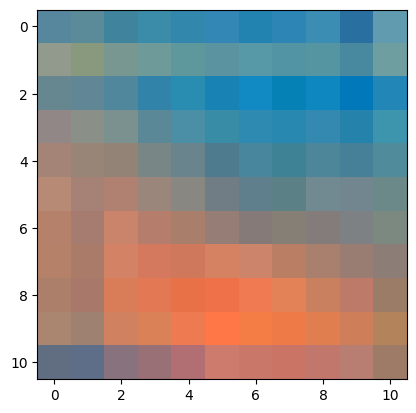

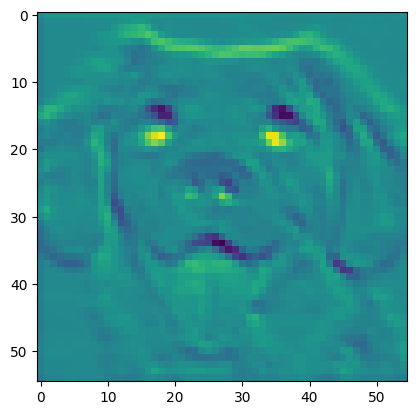

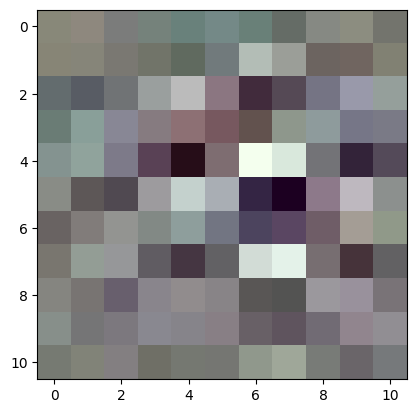

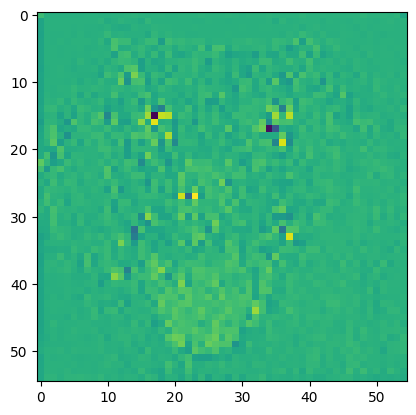

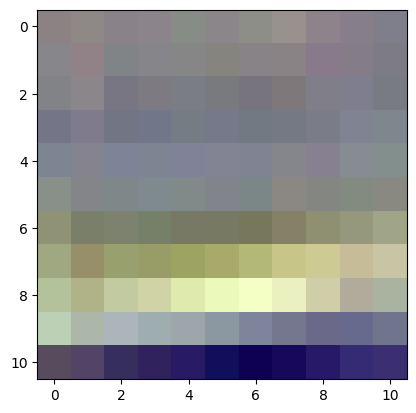

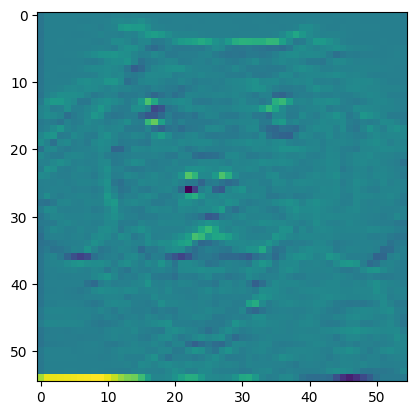

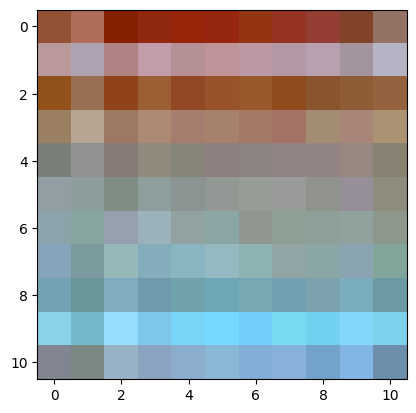

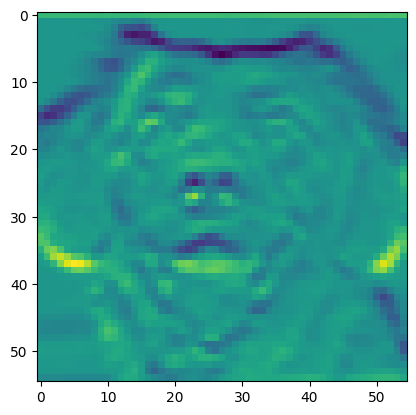

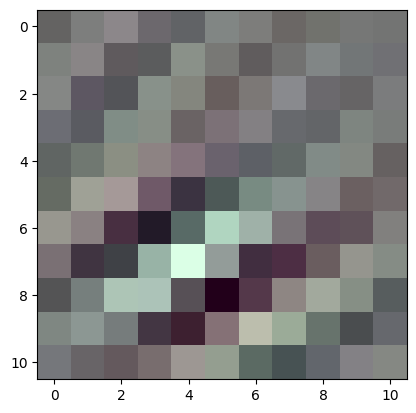

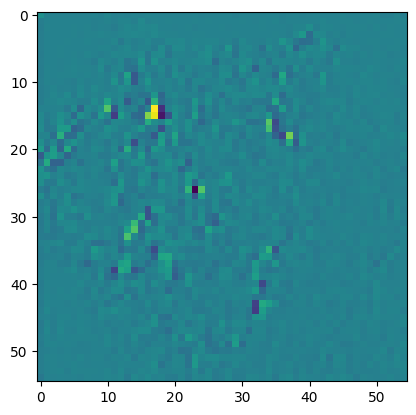

In [ ]:
for i in range(64):
    tensor_plot(w0,i)
    plt.imshow(f0[0,i,:,:].cpu().numpy())
    plt.show()

In [ ]:
f1 = F.relu(f0)

In [ ]:
f1.shape

torch.Size([1, 64, 55, 55])

In [ ]:
f2 = F.max_pool2d(f1,kernel_size=3, stride=2, padding=0, dilation=1)

In [ ]:
f2.shape

torch.Size([1, 64, 27, 27])

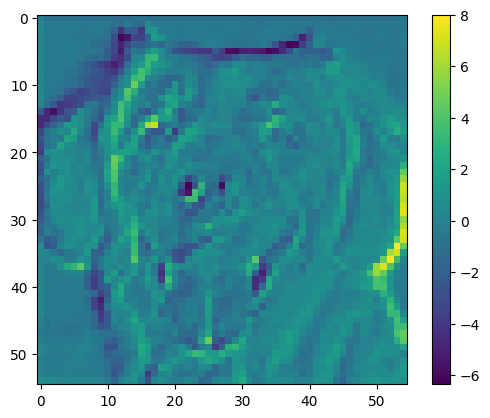

In [ ]:
i = 0
plt.imshow(f0[0,i,:,:].cpu().numpy())
plt.colorbar()

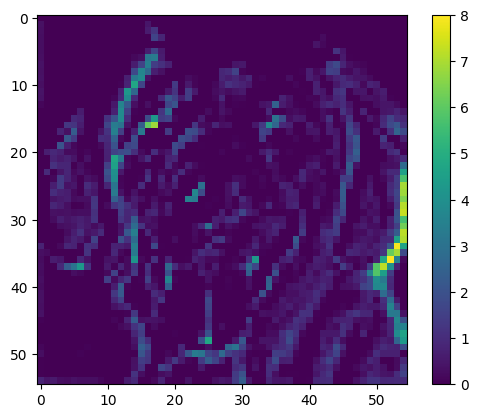

In [ ]:
i = 0
plt.imshow(f1[0,i,:,:].cpu().numpy())
plt.colorbar()

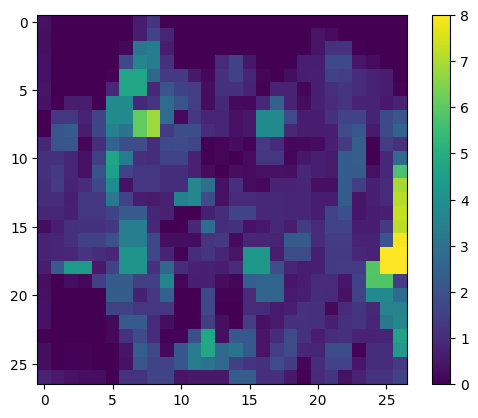

In [ ]:
i = 0
plt.imshow(f2[0,i,:,:].cpu().numpy())
plt.colorbar()

In [ ]:
f3 = F.conv2d(f2, w1, stride=1, padding=2)

f4 = F.relu(f3)

f5 = F.max_pool2d(f4,kernel_size=3, stride=2, padding=0, dilation=1)

f6 = F.conv2d(f5, w2, stride=1, padding=1)

f7 = F.relu(f6)

f8 = F.conv2d(f7, w3, stride=1, padding=1)

f9 = F.relu(f8)

f10 = F.conv2d(f9, w4, stride=1, padding=1)

f11 = F.relu(f10)

f12 = F.max_pool2d(f11, kernel_size=3, stride=2, padding=0, dilation=1)

f13 = F.adaptive_avg_pool2d(f12,output_size=6).flatten()

f14 = F.linear(f13,w5)

f15 = F.relu(f14)

f16 = F.linear(f15,w6)

f17 = F.relu(f16)

f18 = F.linear(f17,w7)

out = f18.argmax().item()

In [ ]:
f18.shape

torch.Size([1000])

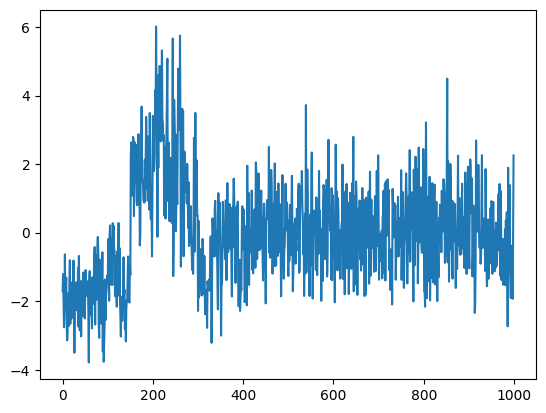

In [ ]:
plt.plot(f18.cpu().numpy())

In [ ]:
out

207

In [ ]:
labels

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [ ]:


labels[out]

'golden retriever'

In [ ]:
f18.argmax()

tensor(207, device='cuda:0')

In [ ]:
labels[207]

'golden retriever'

In [ ]:
ls -l

total 238644
-rw-r--r-- 1 root root 244365080 Jul  6 18:45 Hahn_Alex.pt
drwxr-xr-x 1 root root      4096 Jul  1 21:04 sample_data/


In [ ]:
######
###
#

In [ ]:
def C1(x,w):
    return F.conv2d(x, w, stride=4, padding=2)

In [ ]:
def R(x):
    return F.relu(x)

In [ ]:
def M(x):
    return F.max_pool2d(x, kernel_size=3, stride=2, padding=0, dilation=1)

In [ ]:
def C2(x,w):
    return F.conv2d(x, w, stride=1, padding=2)

In [ ]:
def C3(x,w):
    return F.conv2d(x, w, stride=1, padding=1)

In [ ]:
def A(x):
    return F.adaptive_avg_pool2d(x,output_size=6).flatten()

In [ ]:
def L(x,w):
    return F.linear(x,w)

In [ ]:
f0 = C1(img_t, w0)

f1 = R(f0)

f2 = M(f1)

f3 = C2(f2, w1)

f4 = R(f3)

f5 = M(f4)

f6 = C3(f5,w2)

f7 = R(f6)

f8 = C3(f7,w3)

f9 = R(f8)

f10 = C3(f9,w4)

f11 = R(f10)

f12 = M(f11)

f13 = A(f12)

f14 = L(f13,w5)

f15 = R(f14)

f16 = L(f15,w6)

f17 = R(f16)

f18 = L(f17,w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
####################

In [ ]:
f0 = C1(img_t, w0)
f1 = R(f0)
f2 = M(f1)
f3 = C2(f2, w1)
f4 = R(f3)
f5 = M(f4)
f6 = C3(f5,w2)
f7 = R(f6)
f8 = C3(f7,w3)
f9 = R(f8)
f10 = C3(f9,w4)
f11 = R(f10)
f12 = M(f11)
f13 = A(f12)
f14 = L(f13,w5)
f15 = R(f14)
f16 = L(f15,w6)
f17 = R(f16)
f18 = L(f17,w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
f0 = C1(img_t, w0)
f1 = R(C1(img_t, w0))
f2 = M(R(C1(img_t, w0)))
f3 = C2(M(R(C1(img_t, w0))), w1)
f4 = R(C2(M(R(C1(img_t, w0))), w1))
f5 = M(R(C2(M(R(C1(img_t, w0))), w1)))
f6 = C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)
f7 = R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2))
f8 = C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)
f9 = R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3))
f10 = C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)
f11 = R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4))
f12 = M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))
f13 = A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4))))
f14 = L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)
f15 = R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5))
f16 = L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)),w6)
f17 = R(L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)),w6))
f18 = L(R(L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t, w0))), w1))),w2)),w3)),w4)))),w5)),w6)),w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
f18 = L(R(L(R(L(A(M(R(C3(R(C3(R(C3(M(R(C2(M(R(C1(img_t,w0))),w1))),w2)),w3)),w4)))),w5)),w6)),w7)

out = f18.argmax().item()

labels[out]

'golden retriever'

In [ ]:
w0.shape,w1.shape

(torch.Size([64, 3, 11, 11]), torch.Size([192, 64, 5, 5]))